# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Present in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

train_data = pd.read_csv('train_dataset.csv')
train_salaries = pd.read_csv('train_salaries.csv')
test_data = pd.read_csv('test_dataset.csv')


In [3]:
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [4]:
# check the train salaries data

train_salaries.head()


jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [5]:
# check the test data
test_data.head()



jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [6]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_salaries,on='jobId')
train_data


jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [7]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary'] > 30]

# EDA


## Identifying the number of features or columns


## Know all the names of the columns¶

In [7]:
# get all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## More about the data in the columns like data type it contains and total samples of each

In [8]:
# Check which columns are having categorical, numerical or boolean values of train_dataset

train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [9]:
# Check which columns are having categorical, numerical or boolean values of test_dataset

test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [10]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()


yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [11]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns


test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset using the len() function

In [12]:
# len of train and test dataset
print('train data length:', len(train_data))
print('test data length:', len(test_data))



train data length: 1000000
test data length: 1000000


## Get unique values

In [13]:
# get how many unique values are in train_dataset

for x in train_data.columns:
    print(x, ':', len(train_data[x].unique()))



jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 280


In [14]:
# get how many unique values are in test_dataset


for x in test_data.columns:
    print(x, ':', len(test_data[x].unique()))


jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## Counting the total number of missing values¶

In [15]:
# Check for missing values in all the columnns of the train_dataset

train_data.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [16]:
 # Check for missing values in all the columnns of the test_dataset

test_data.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## Removing 'jobId' and 'companyId' data from train and test data

In [15]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'], axis=1)
train_data




jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[1000000 rows x 7 columns]

In [16]:
# drop jobId and companyId from test_dataset
test_data = test_data.drop(['jobId','companyId'], axis=1)
test_data


jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [17]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
    if train_data[x].dtype == 'object':
        categorical_list.append(x)
    elif train_data[x].dtype == 'int64':
        var_list.append(x)
    elif train_data[x].dtype == 'float64':
        var_list.append(x)
        
        
categorical_list


['jobType', 'degree', 'major', 'industry']

## Correlation Matrix

#### A correlation matrix is a table showing correlation coefficients between variables.

In [18]:
# Correlation metrix using pandas
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

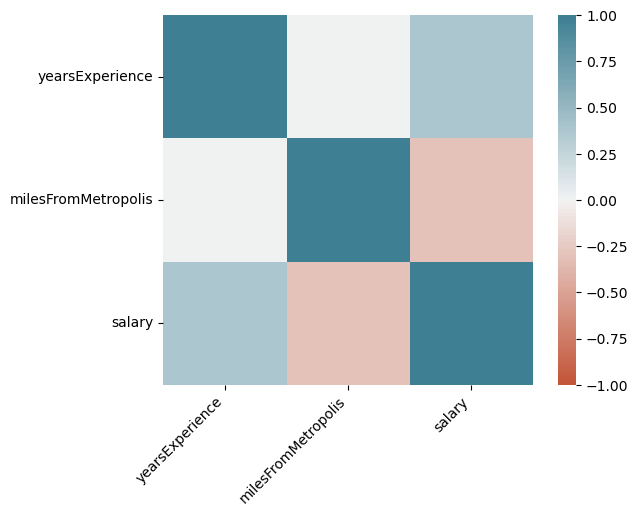

In [27]:
# Correlation metrix using seaborn
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right')

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [28]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [29]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
    for i in categorical_list:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobId   companyId 

Degree of Freedom:  61999938
Significance level:  0.05
chi-square statistic:  1968513.9999671844
critical_value: 62018255.44261275
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobId   jobType 

Degree of Freedom:  6999993
Significance level:  0.05
chi-square statistic:  1750853.0000124383
critical_value: 7006148.612465394
p-value: 1.0
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobId   degree 

Degree of Freedom:  3999996
Significance level:  0.05
chi-square statistic:  1649140.9999923743
critical_value: 4004649.48303998
p-value: 1.0
Retain H0,There is no relationship between 2 ca

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  4496.503699312424
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  major   degree 

Degree of Freedom:  32
Significance level:  0.05
chi-square statistic:  249310.28671089053
critical_value: 46.19425952027847
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  major   industry 

Degree of Freedom:  48
Significance level:  0.05
chi-square statistic:  13.874149773597367
critical_value: 65.17076890356982
p-value: 0.9999996676173925
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no rel

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


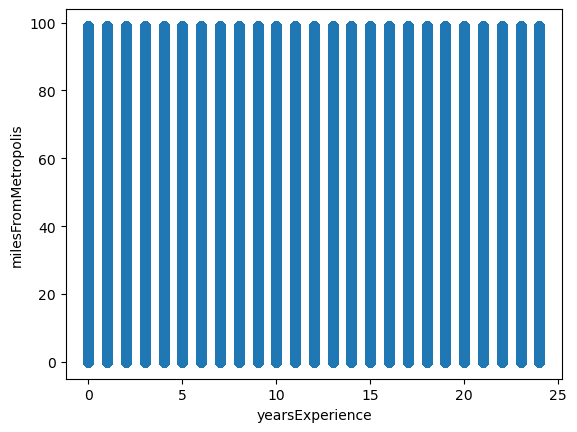

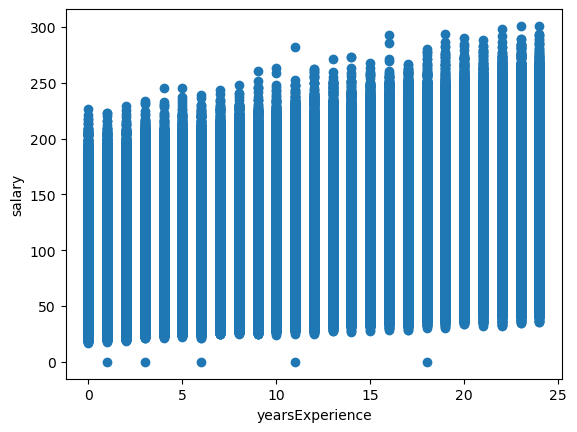

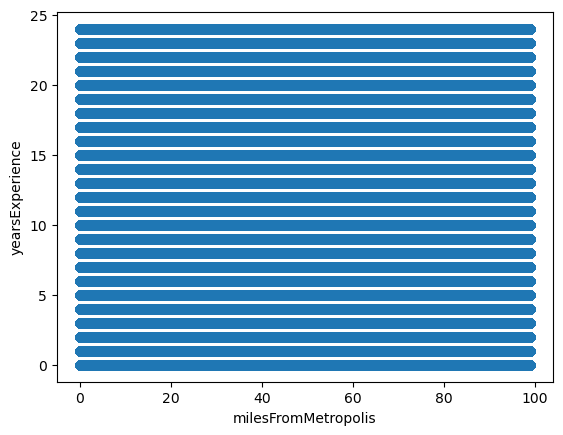

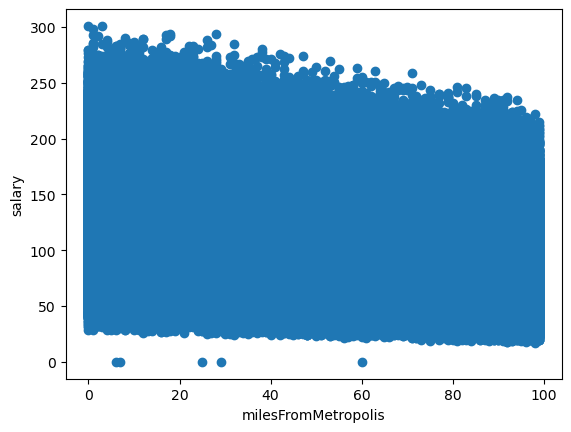

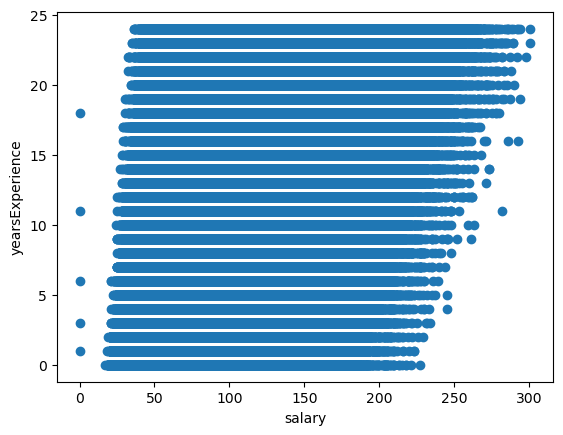

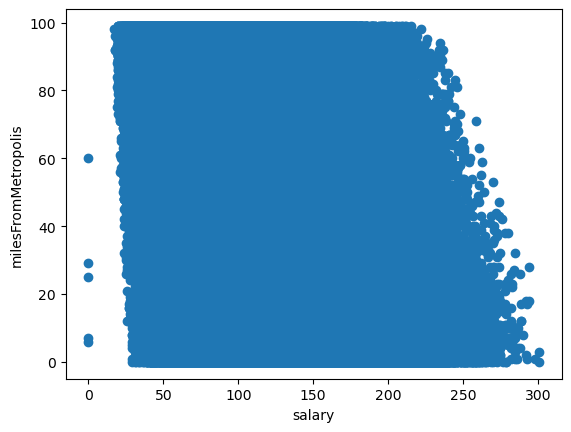

In [30]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x], train_data[y])
    plt.show()

# Loop through the different columns 
for i in var_list:
    for j in var_list:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<AxesSubplot:title={'center':'yearsExperience'}>,
        <AxesSubplot:title={'center':'milesFromMetropolis'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

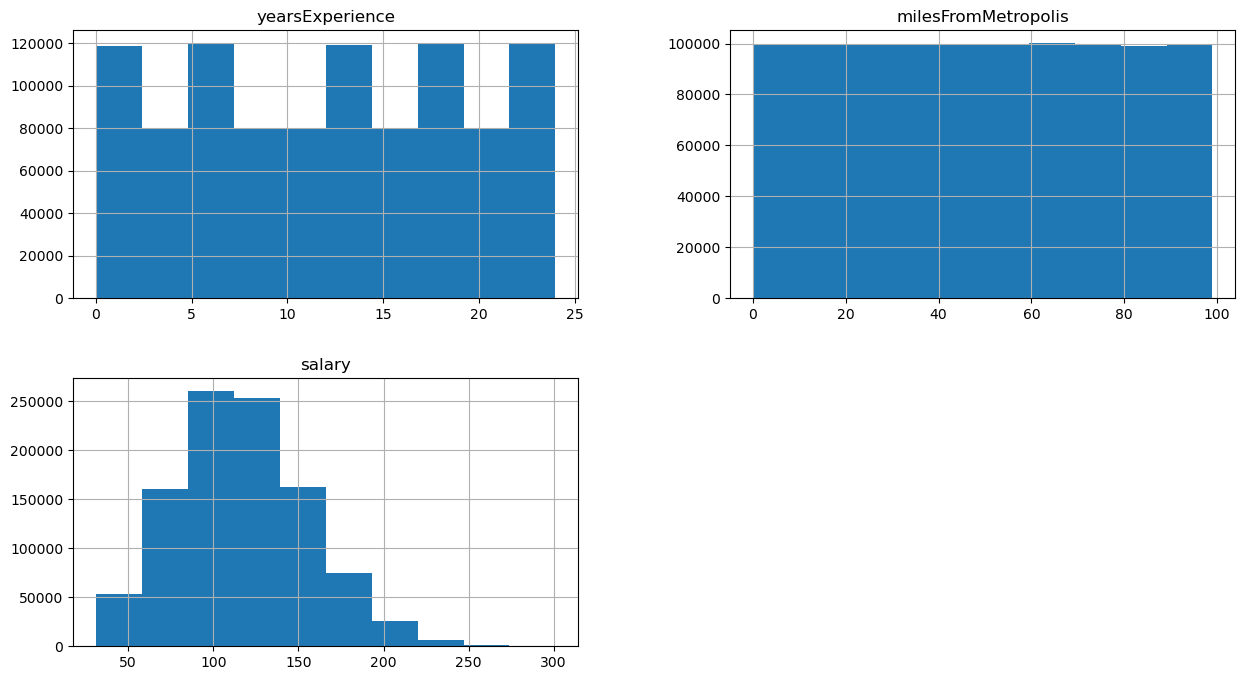

In [26]:
# Histogram using pandas 
train_data.hist(figsize=(15,8))



From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


<AxesSubplot:>

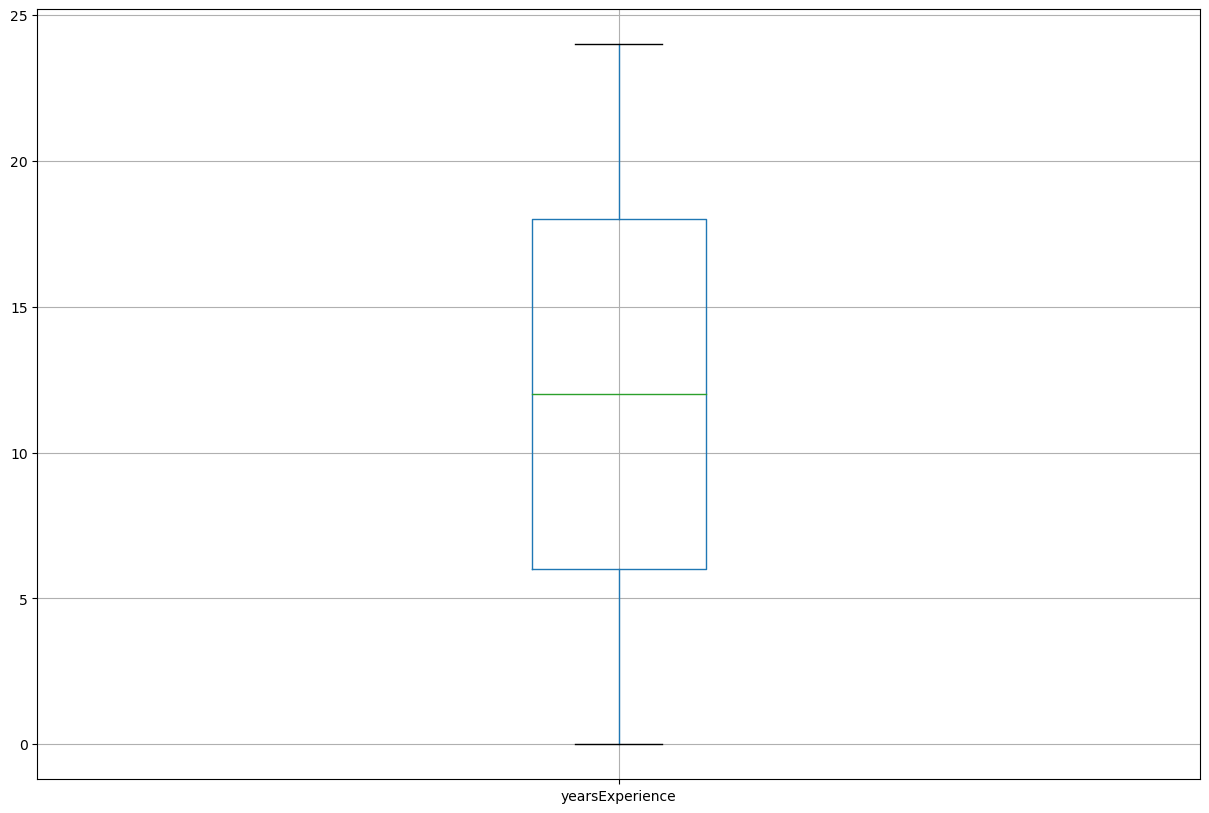

In [31]:
# box plot using pandas 
# box plot for yearsExperience column


train_data.boxplot(column='yearsExperience', figsize=(15,10))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

<AxesSubplot:>

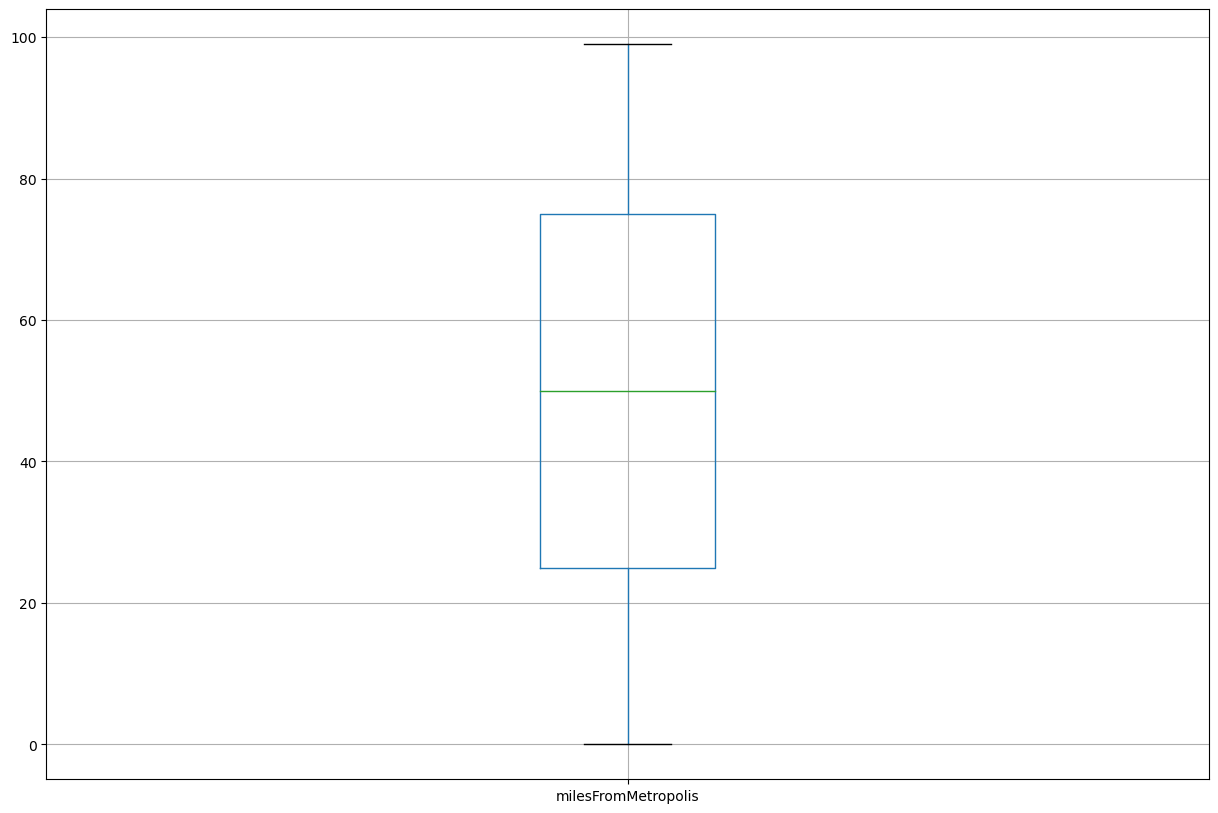

In [32]:
# box plot using pandas 
# box plot for milesFromMetropolies column


train_data.boxplot(column='milesFromMetropolis', figsize=(15,10))




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<AxesSubplot:>

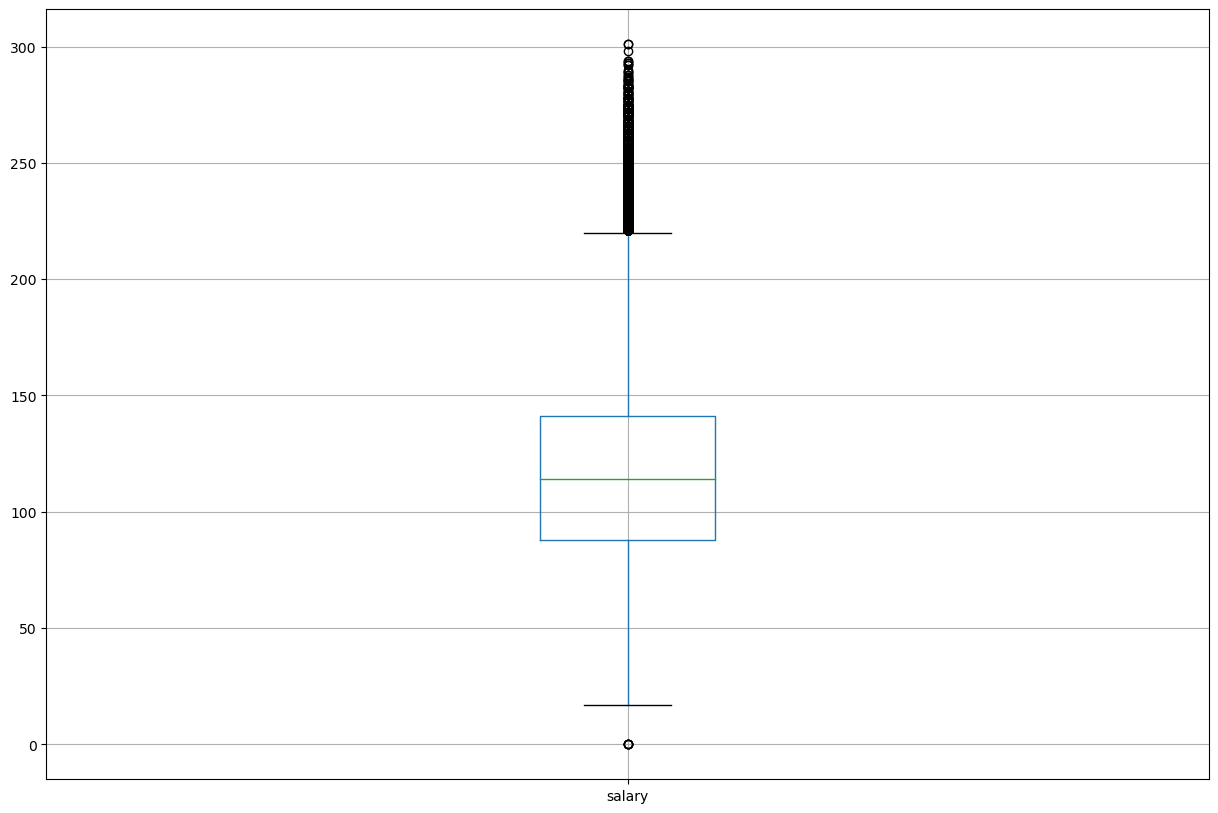

In [33]:
# box plot using pandas 
# box plot for salary column

train_data.boxplot(column='salary', figsize=(15,10))



from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

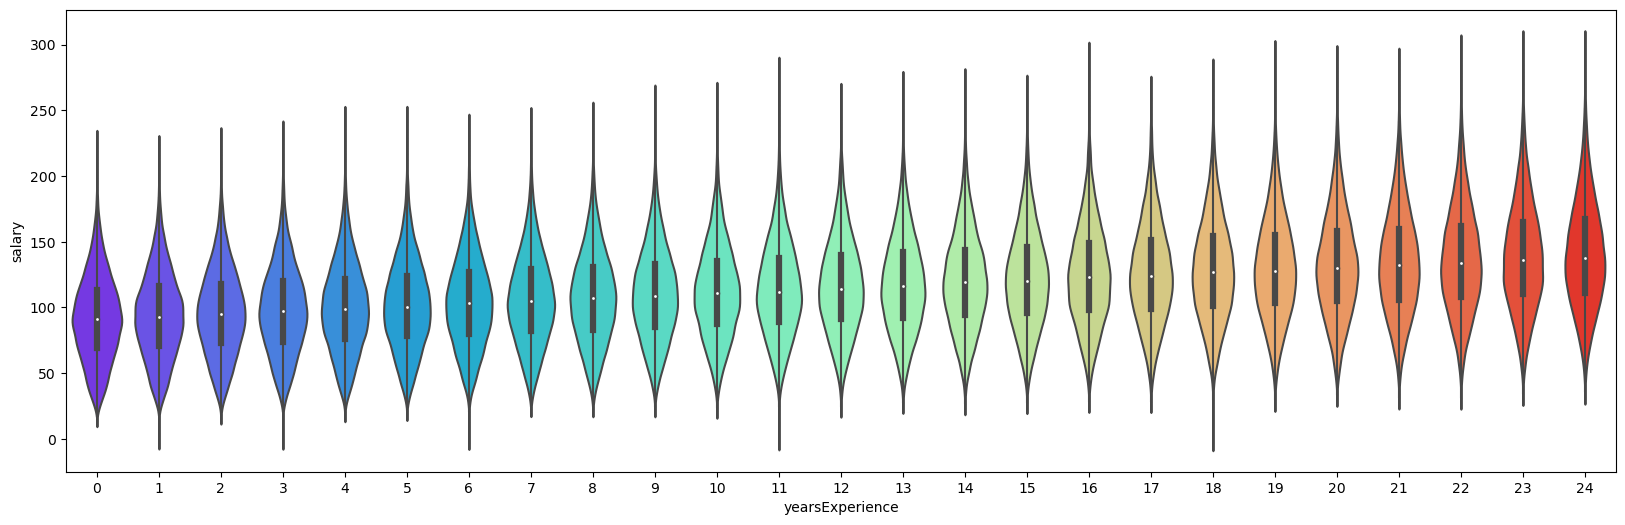

In [34]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.violinplot(x='yearsExperience', y='salary', data=train_data,palette='rainbow')




from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

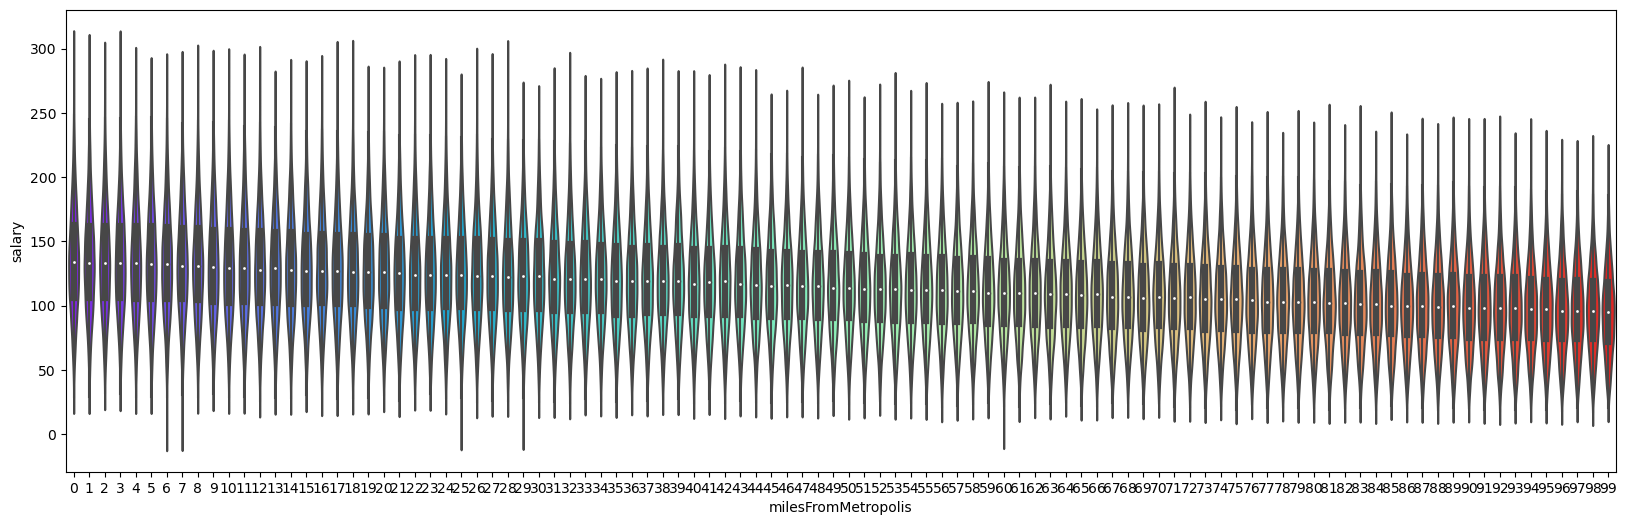

In [35]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))


sns.violinplot(x='milesFromMetropolis', y='salary', data=train_data,palette='rainbow')


from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

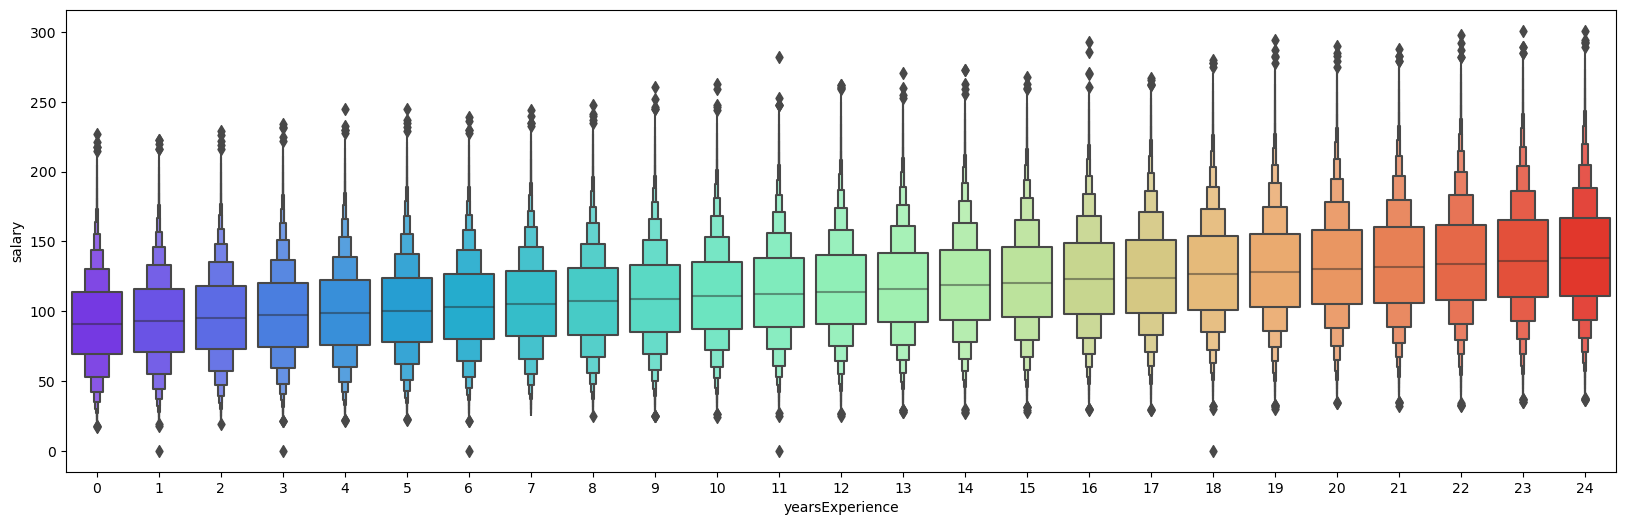

In [36]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.boxenplot(x='yearsExperience', y='salary', data=train_data,palette='rainbow')


## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


<AxesSubplot:xlabel='yearsExperience', ylabel='count'>

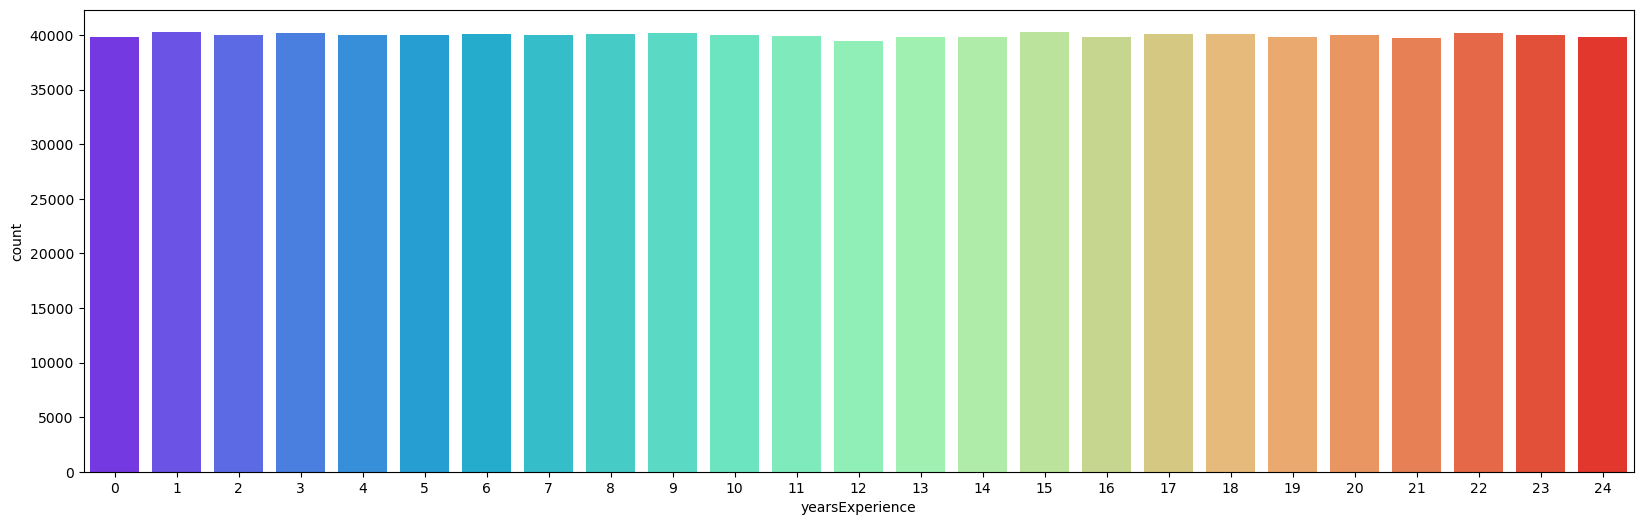

In [37]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))


sns.countplot(x='yearsExperience', data=train_data, palette='rainbow')


From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='count'>

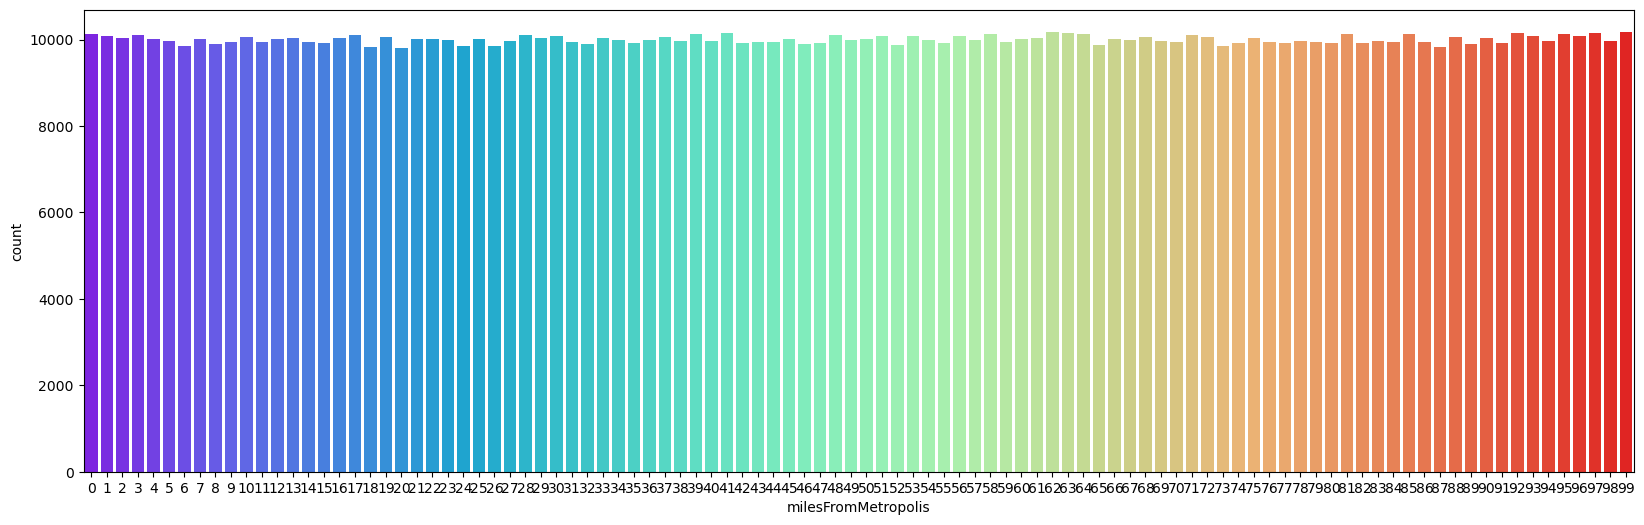

In [38]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))

sns.countplot(x='milesFromMetropolis', data=train_data, palette='rainbow')



From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

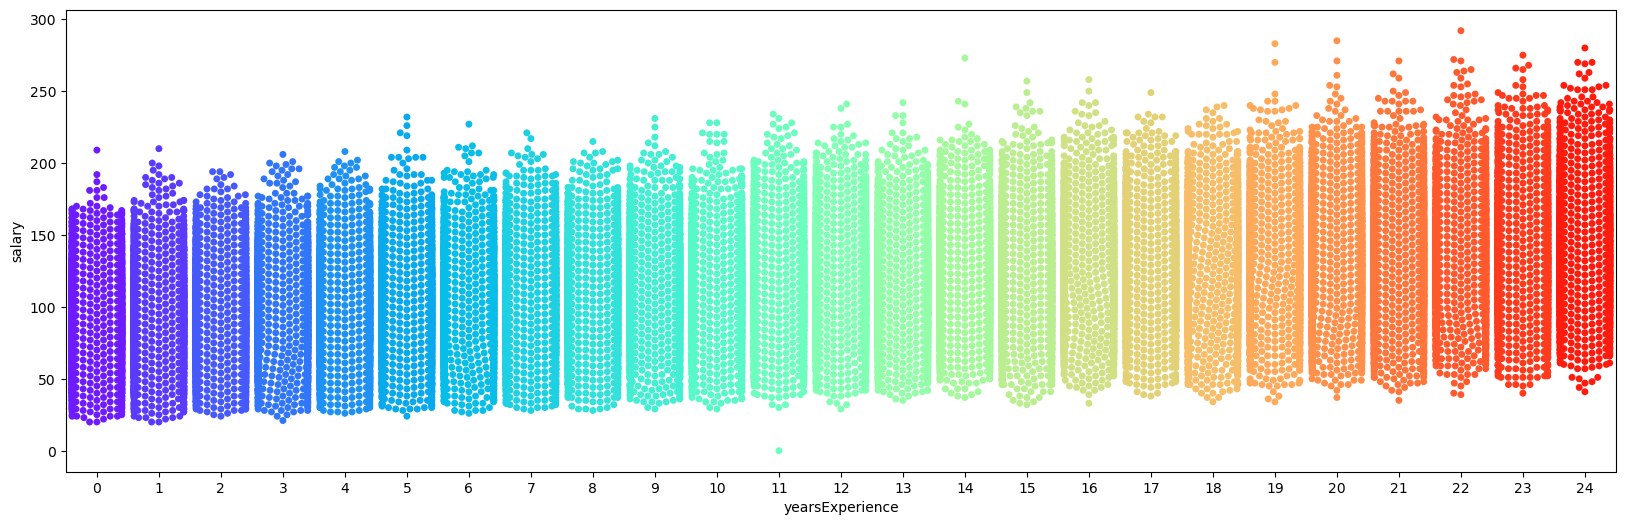

In [39]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.swarmplot(x='yearsExperience', y='salary', data=train_data.iloc[1:50000], palette='rainbow')



from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

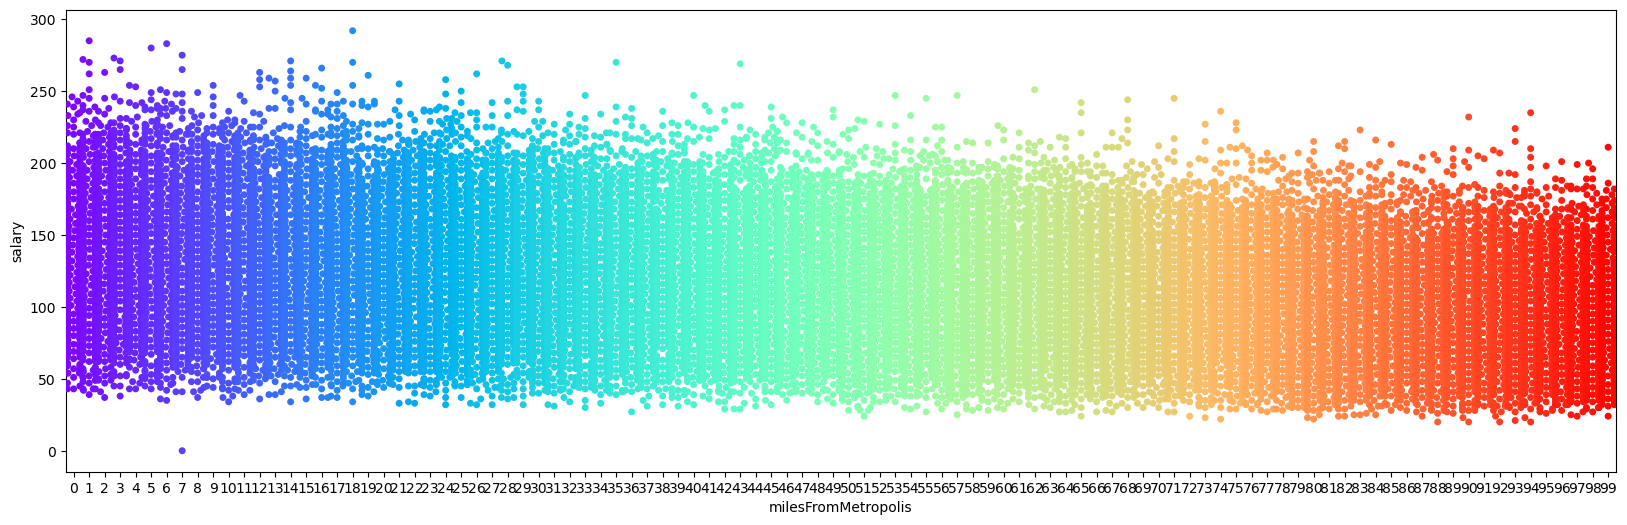

In [40]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))


sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data.iloc[1:50000], palette='rainbow')



from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

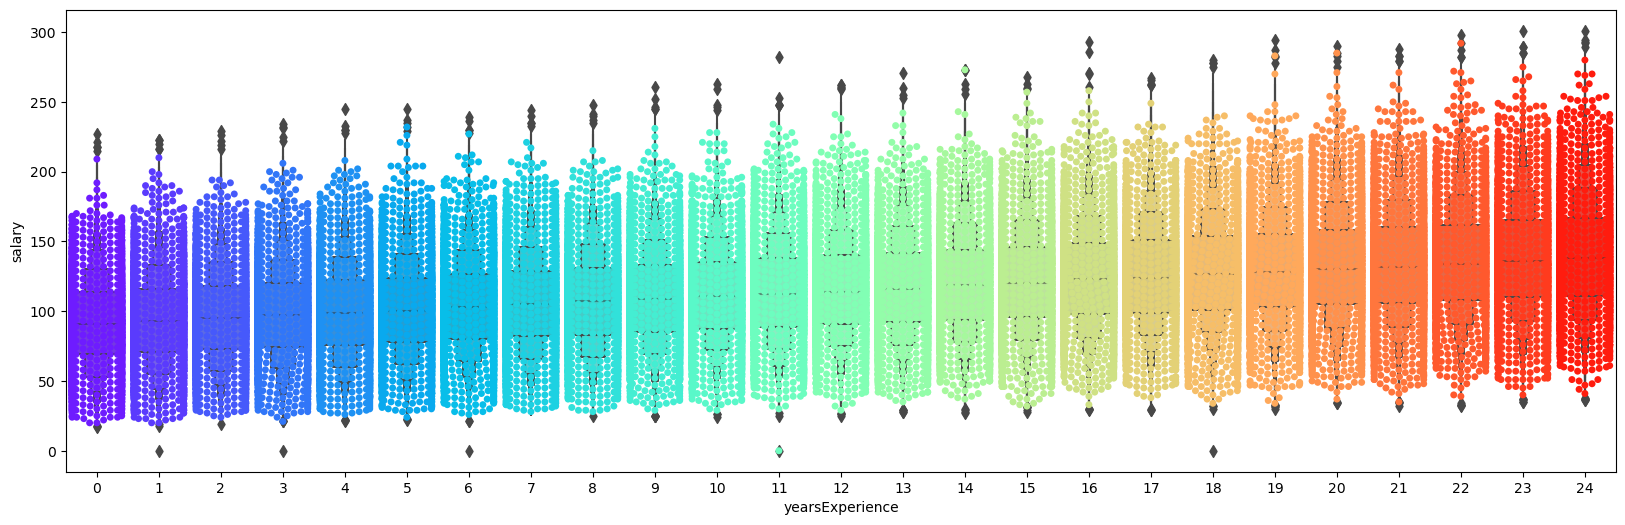

In [41]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.boxenplot(x='yearsExperience', y='salary', data=train_data,palette='rainbow')
sns.swarmplot(x='yearsExperience', y='salary', data=train_data.iloc[1:50000], palette='rainbow')


from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

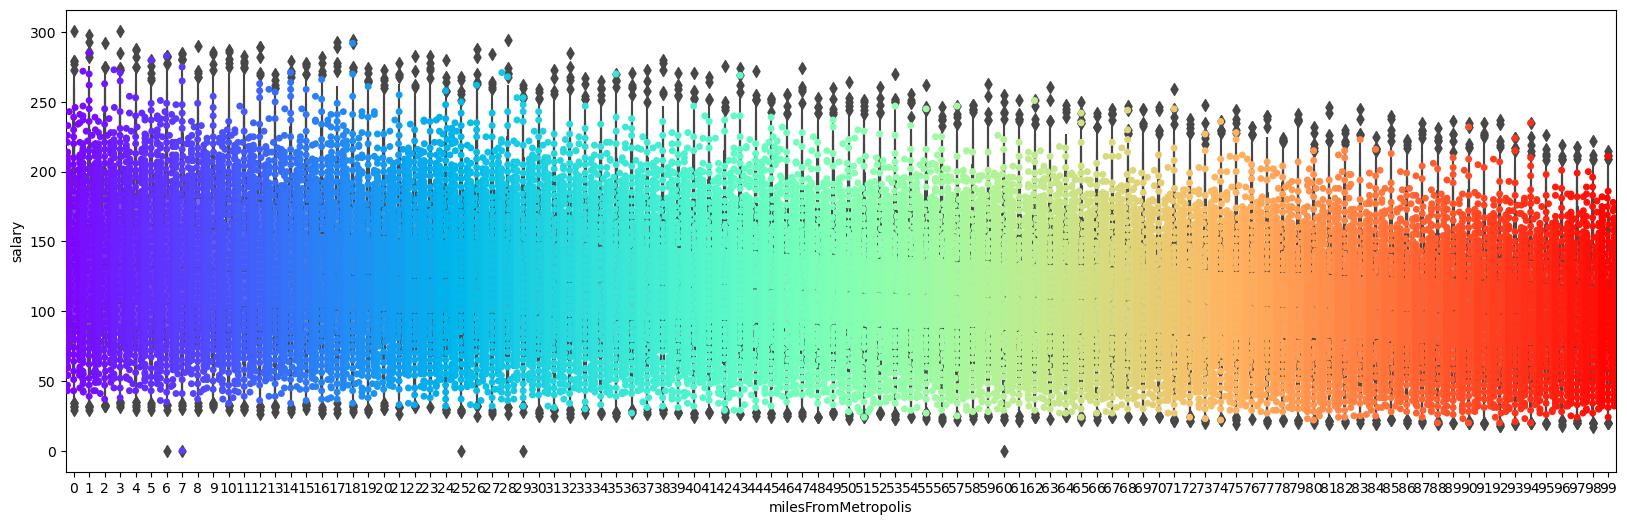

In [42]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))


sns.boxenplot(x='milesFromMetropolis', y='salary', data=train_data,palette='rainbow')
sns.swarmplot(x='milesFromMetropolis', y='salary', data=train_data.iloc[1:50000], palette='rainbow')



from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

<AxesSubplot:xlabel='yearsExperience', ylabel='salary'>

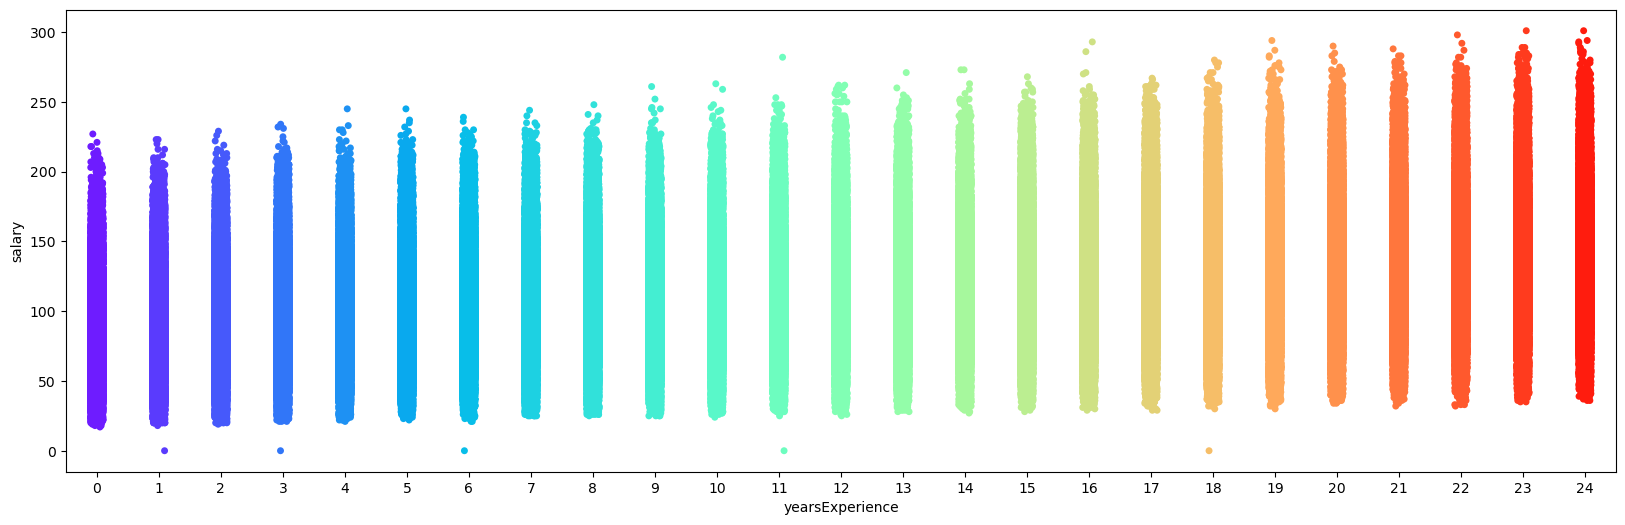

In [43]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(x='yearsExperience', y='salary', data=train_data,palette='rainbow')



from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

<AxesSubplot:xlabel='milesFromMetropolis', ylabel='salary'>

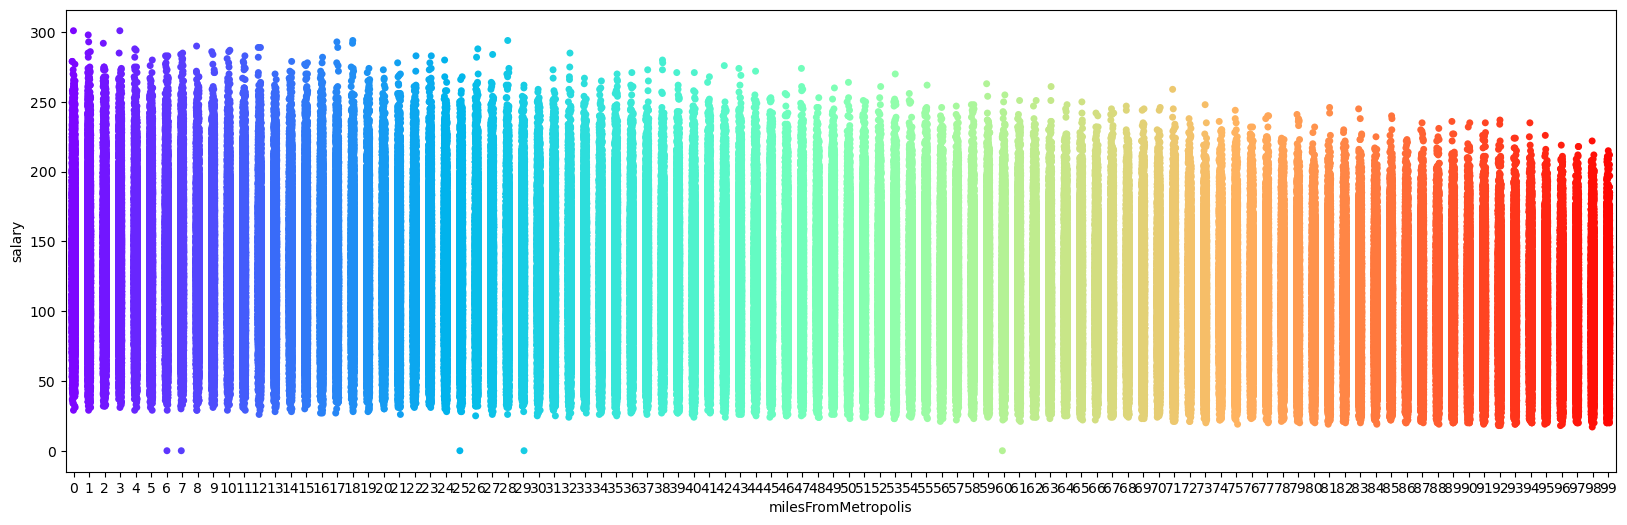

In [44]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))

sns.stripplot(x='milesFromMetropolis', y='salary', data=train_data,palette='rainbow')


from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [45]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [55]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary'], axis=1)


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
train_for_vif = train_for_vif.apply(pd.to_numeric, errors='coerce')
train_for_vif = train_for_vif.dropna(axis=1, how='all')


In [56]:
names = train_for_vif.columns

for i in range(0, len(names)):
    # taking one column as target variable
    y = train_for_vif.loc[:, train_for_vif.columns == names[i]]
    # taking all other remaining columns as feature variable
    x = train_for_vif.loc[:, train_for_vif.columns != names[i]]
    # fitting the OLS model on y and x
    model = sm.OLS(y, x)
    results = model.fit()
    # getting the r^2 value of results.
    rsq = results.rsquared
    # calculating vif value
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of {} column is {} keeping all other columns as features".format(names[i], (round(rsq, 2))))
    print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))



R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.21 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.21 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [57]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


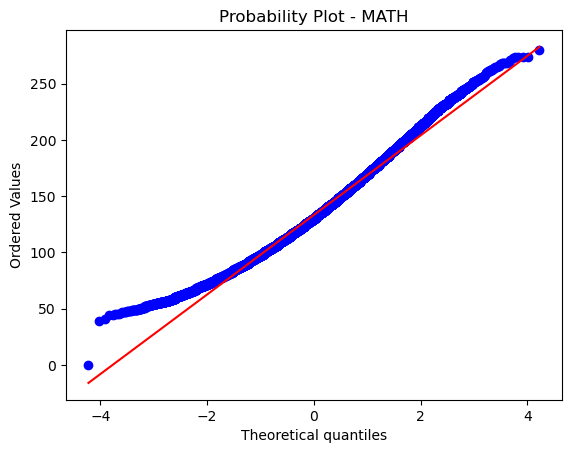

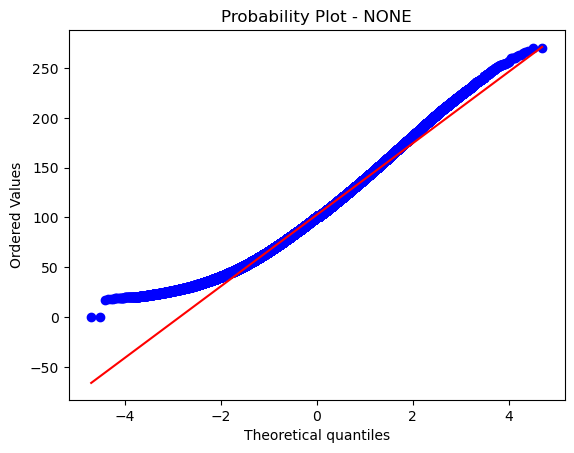

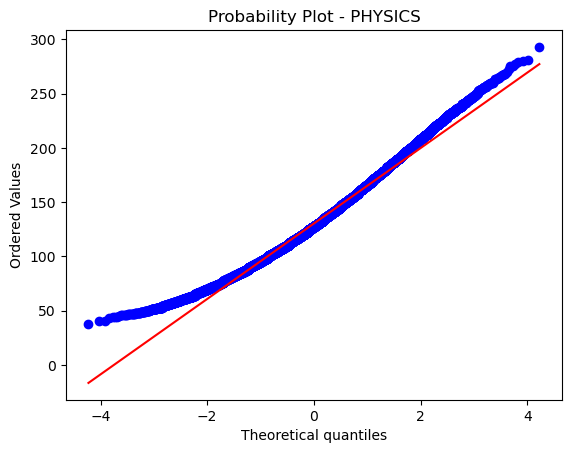

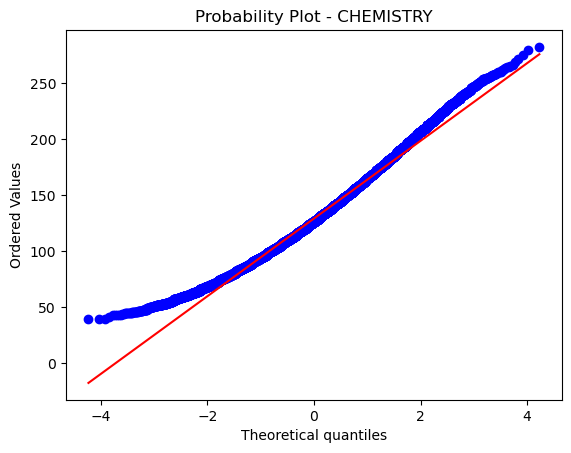

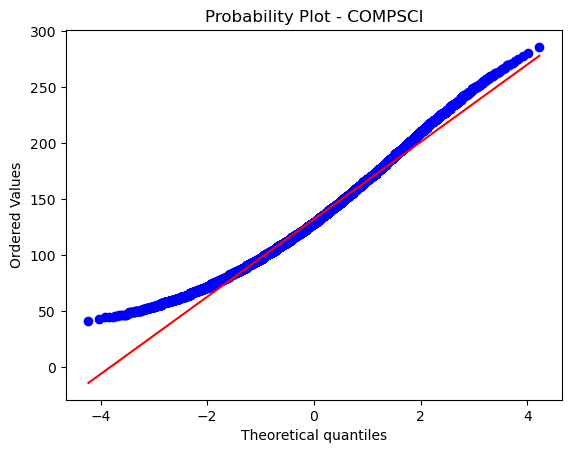

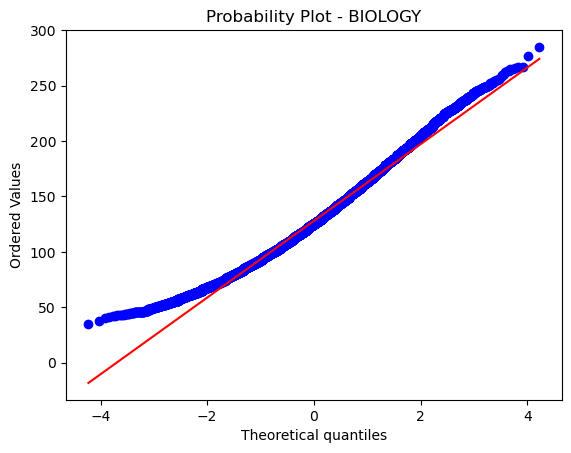

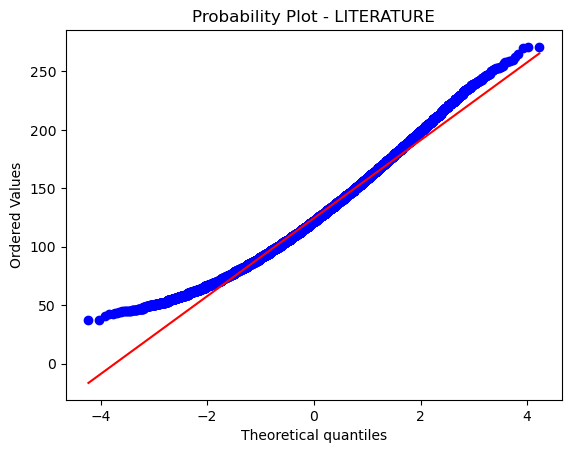

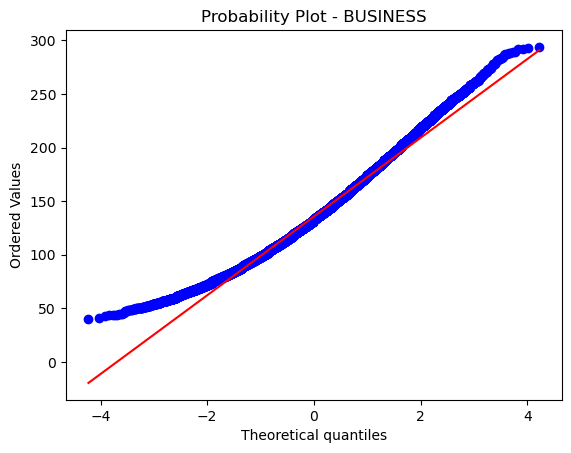

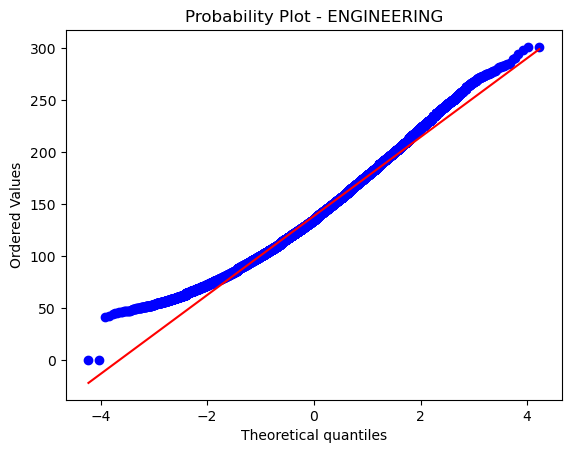

salary    1.137312
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        214940060.760225       8  26867507.595028  20922.428835   
Within Groups        1284137037.774666  999991      1284.148595                 
Total                1499077098.534891  999999      1499.078598                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20922.428835180388  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2

In [58]:
# perform anova test on major and salary

perform_anova_test('major', 'salary')


          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


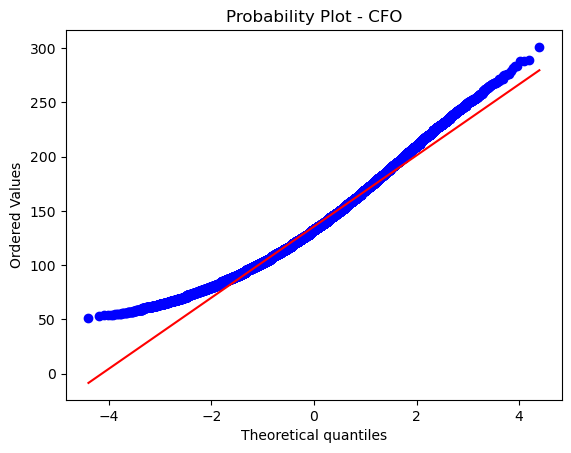

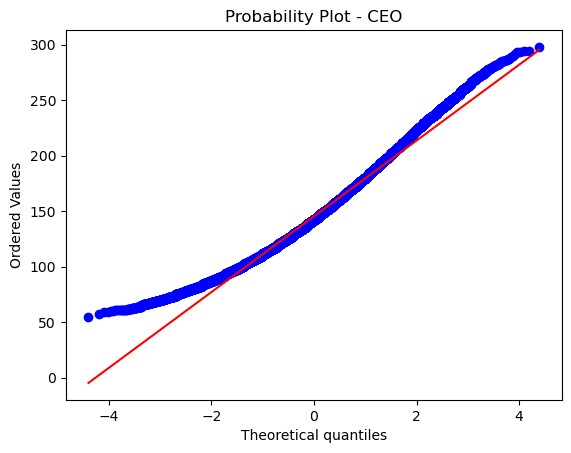

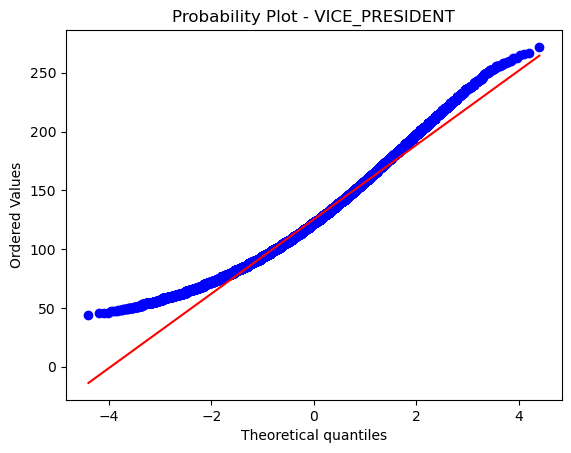

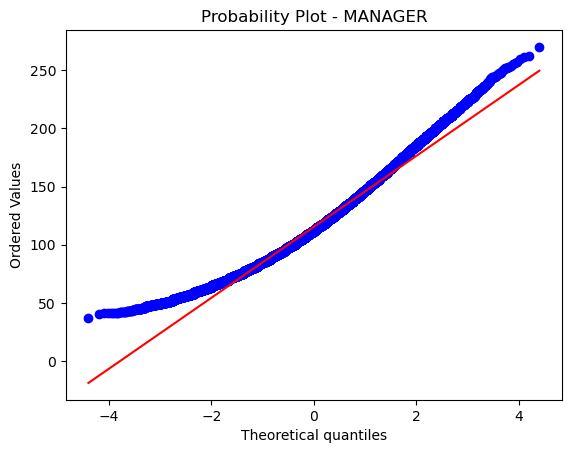

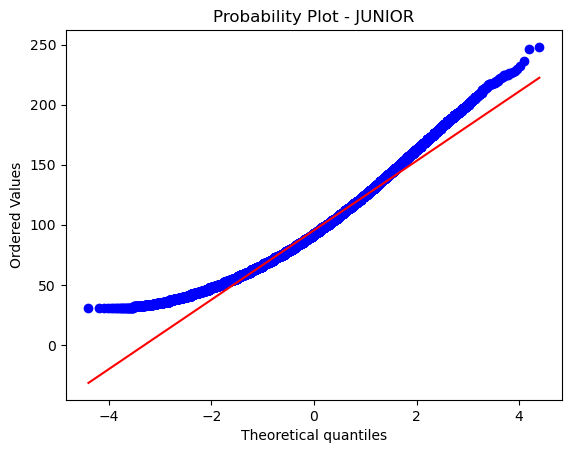

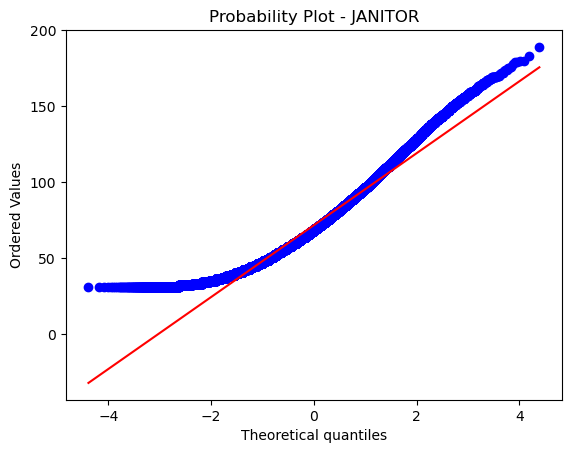

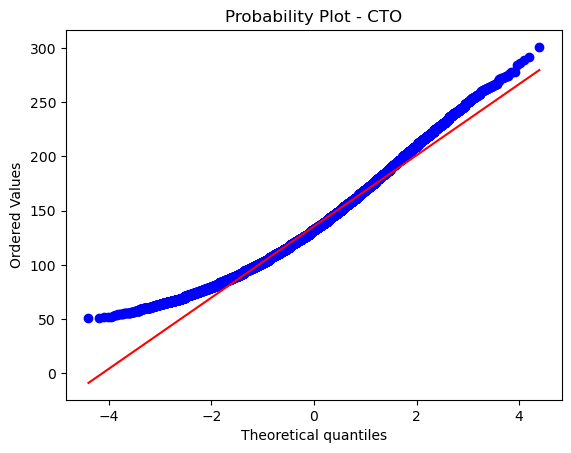

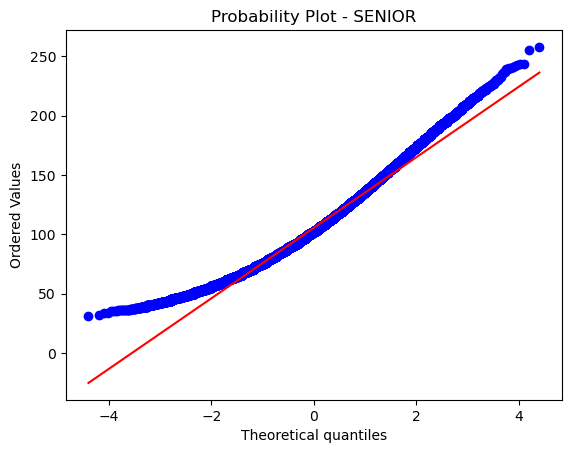

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9

In [14]:
# perform anova test on jobType and salary

perform_anova_test('jobType', 'salary')


        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


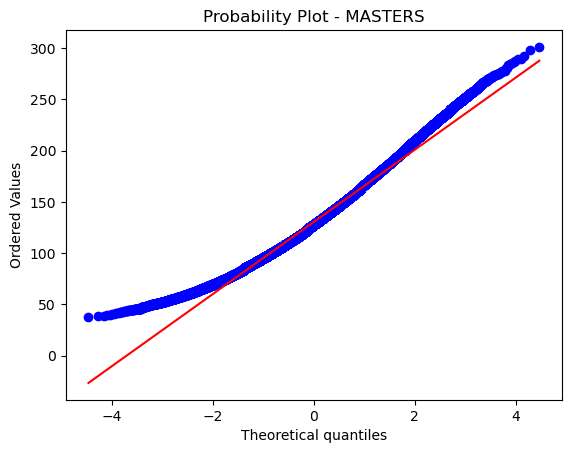

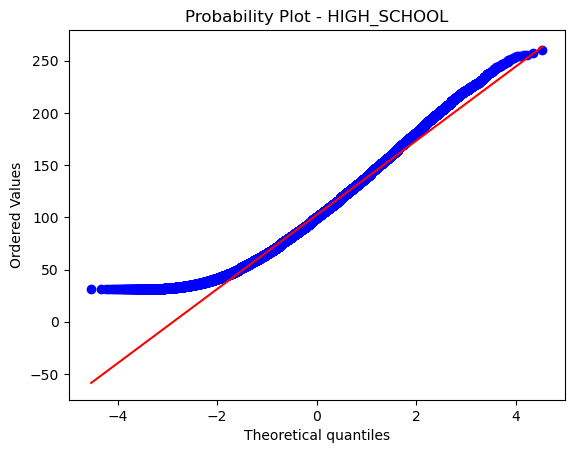

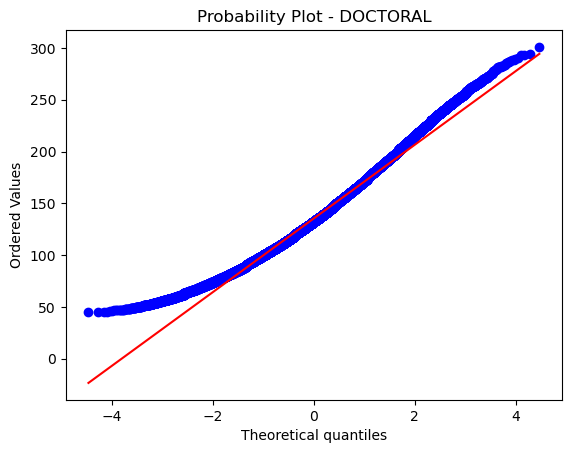

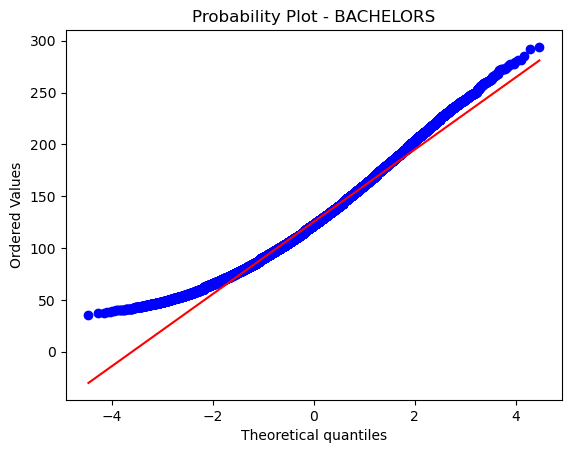

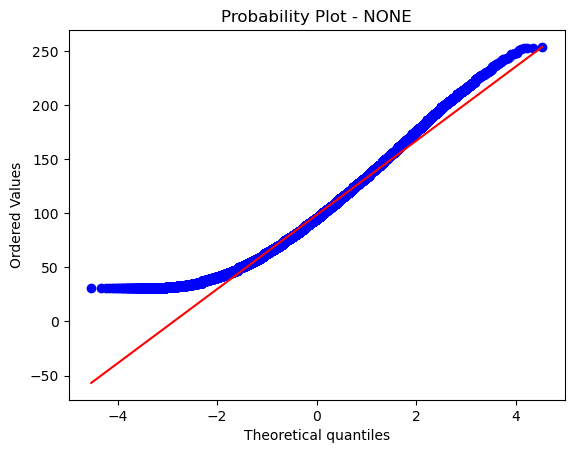

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47

In [15]:
# perform anova test on degree and salary


perform_anova_test('degree', 'salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


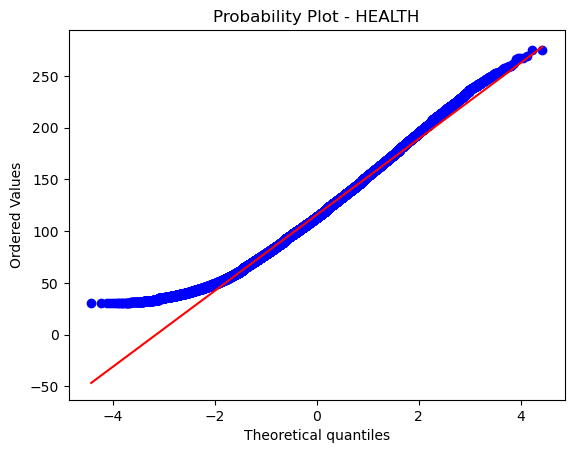

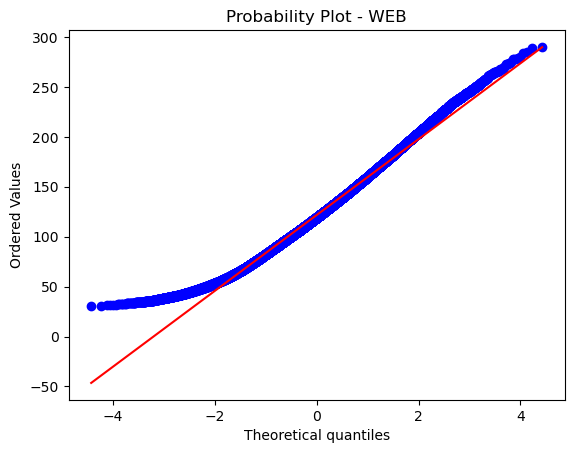

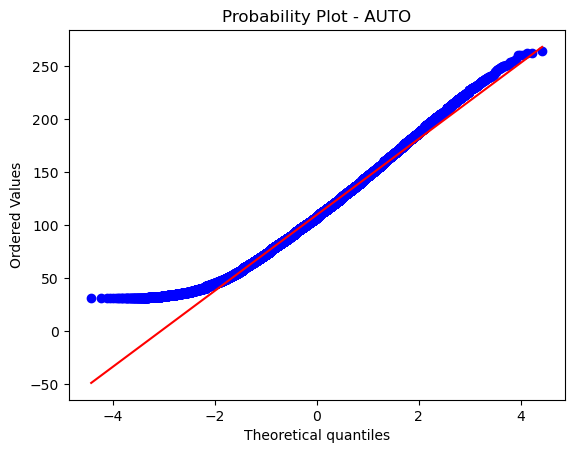

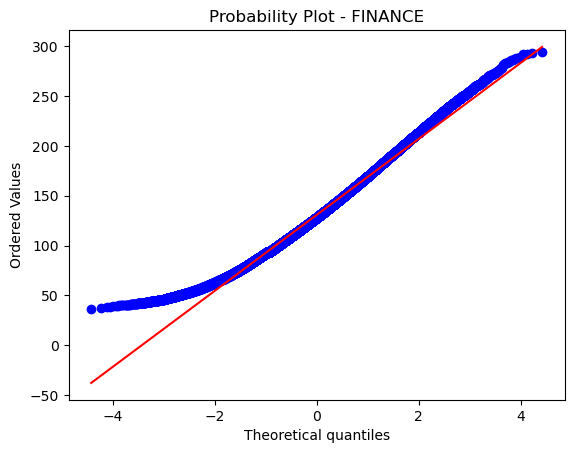

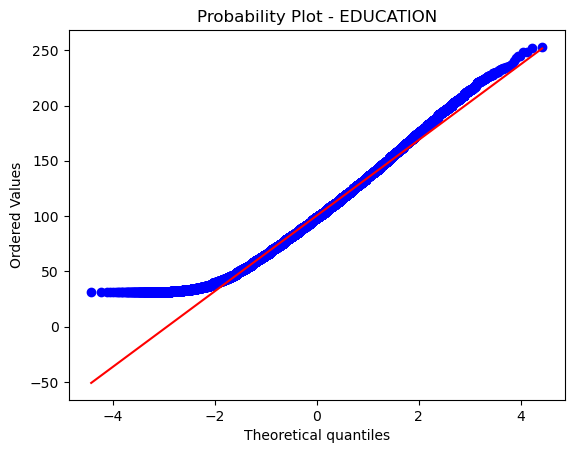

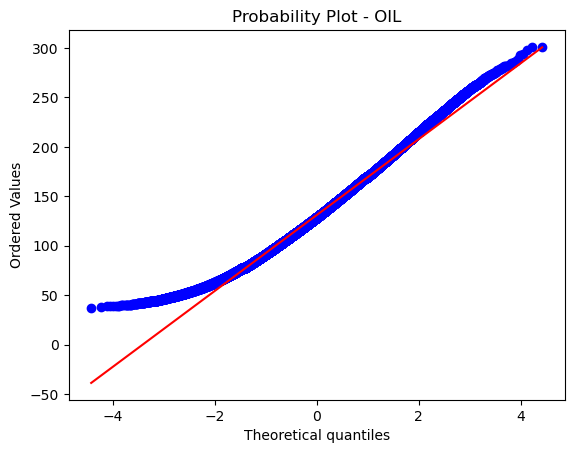

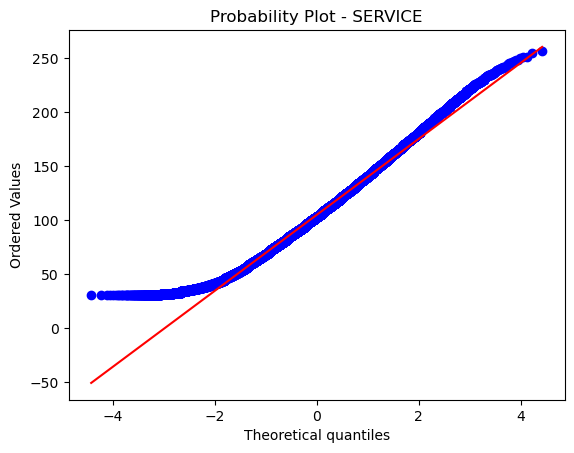

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287

In [16]:
# perform anova test on industry and salary


perform_anova_test('industry', 'salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


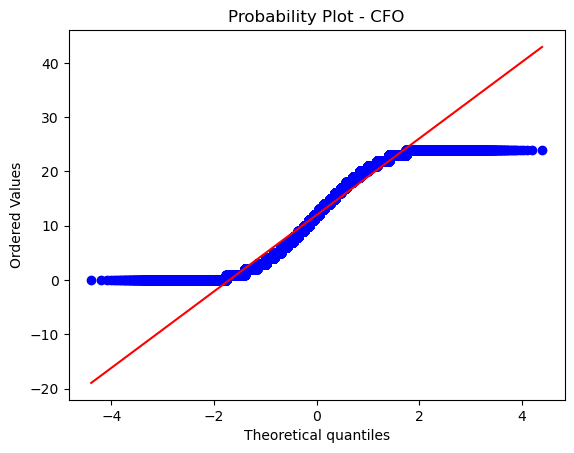

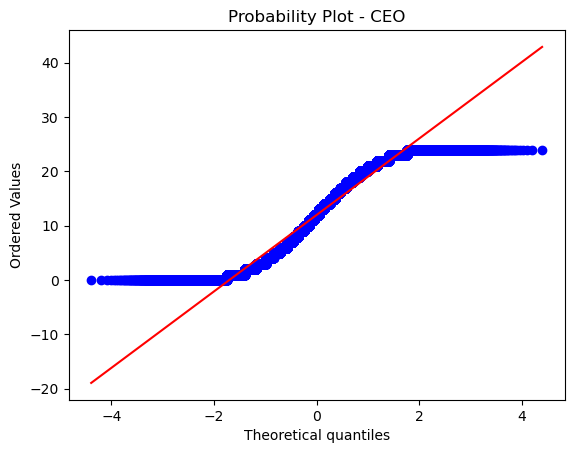

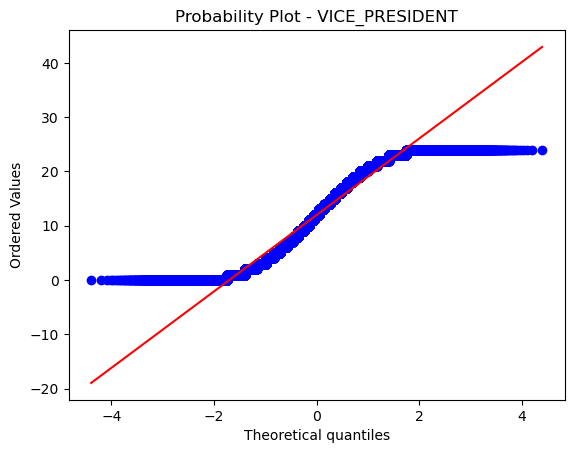

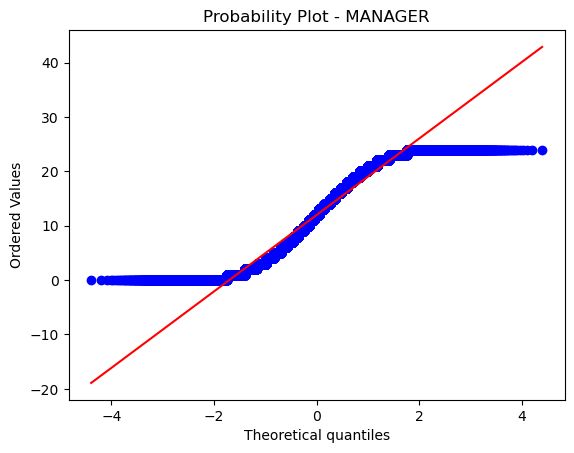

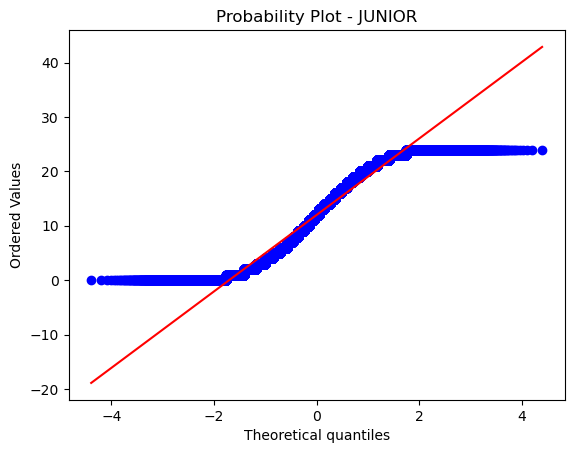

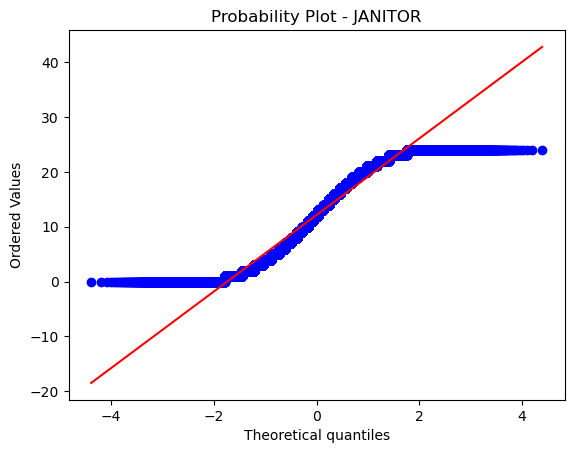

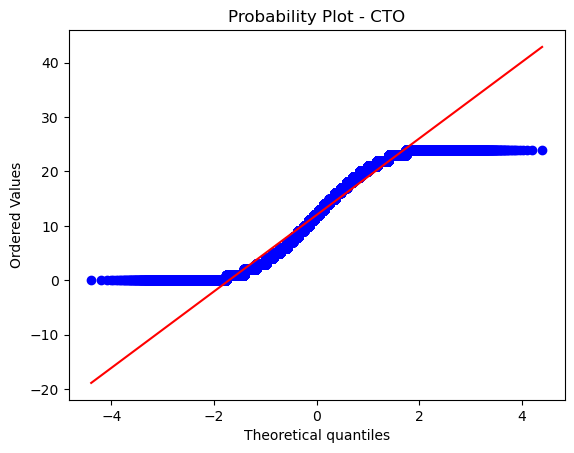

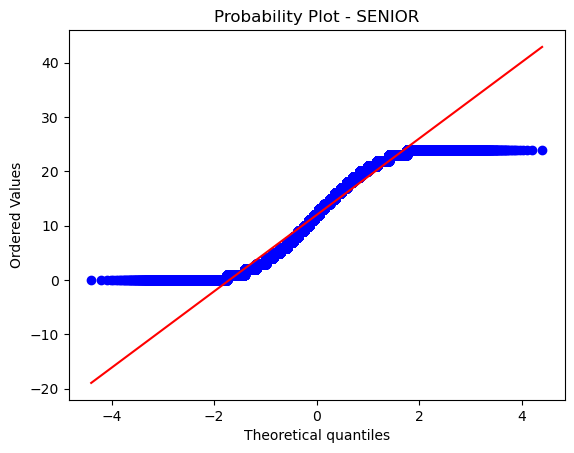

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and critical value is: 2.2875503809

In [17]:
# perform anova test on jobType and yearsExperience


perform_anova_test('jobType', 'yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


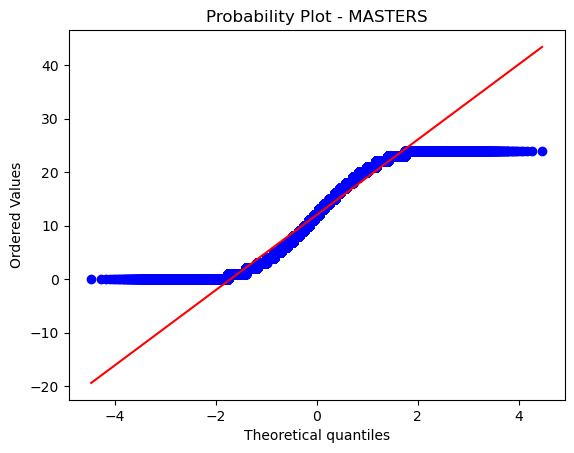

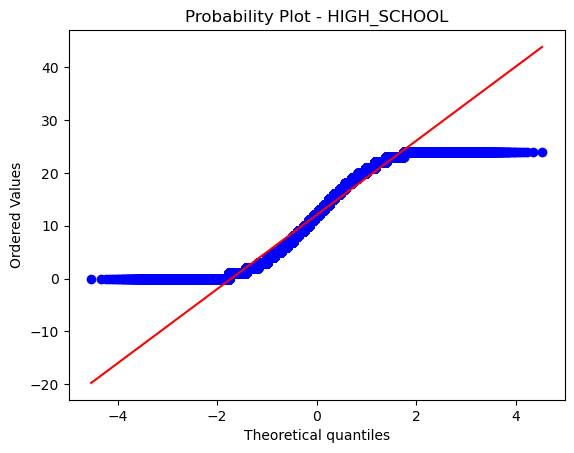

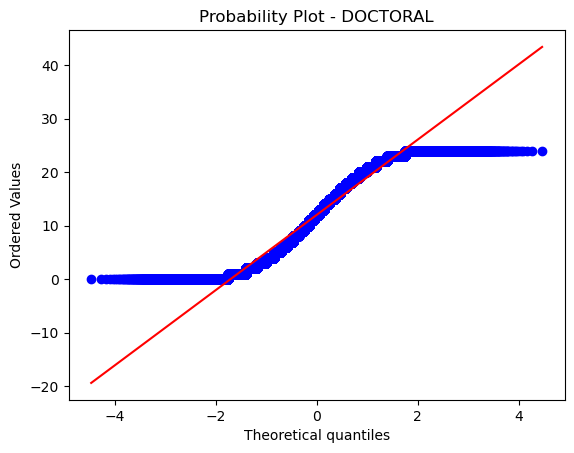

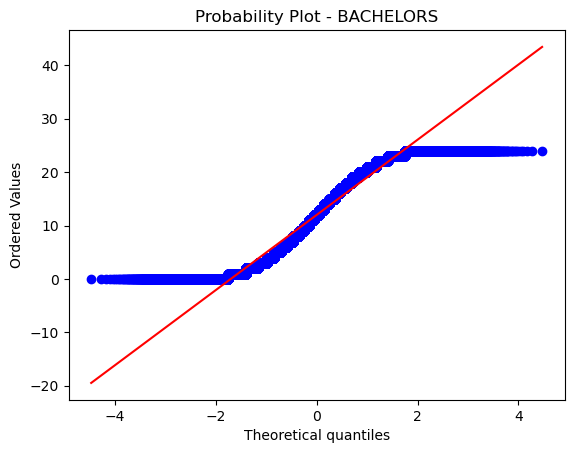

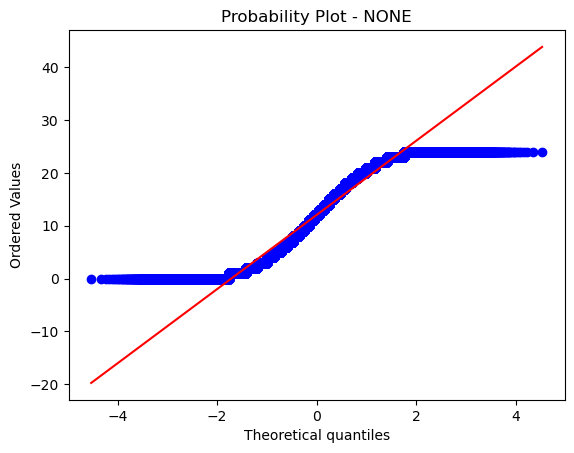

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2

In [18]:
# perform anova test on degree and yearsExperience


perform_anova_test('degree', 'yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


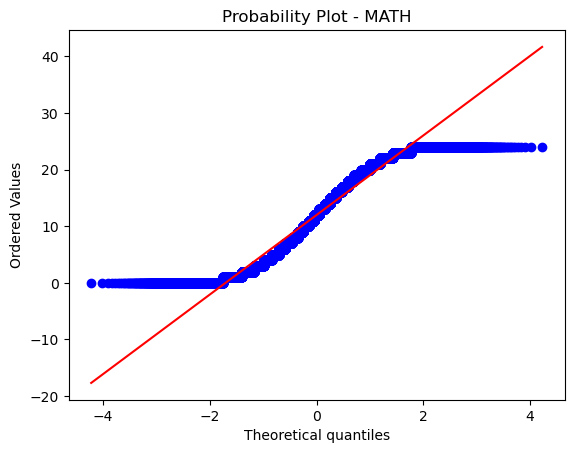

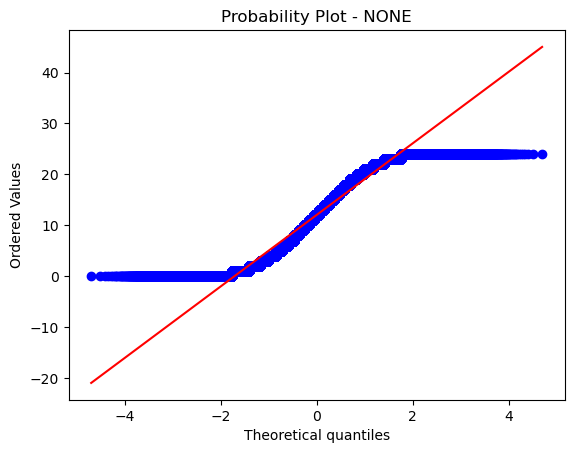

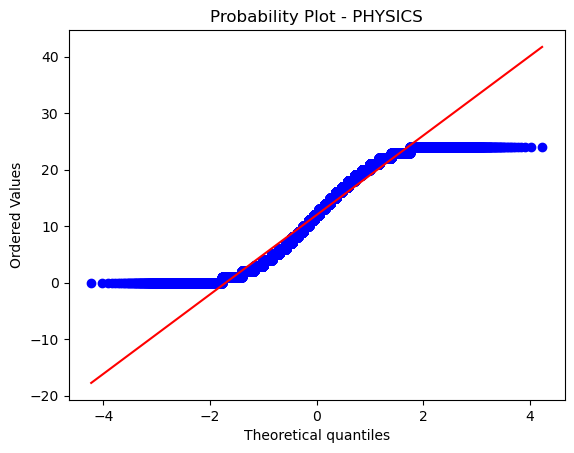

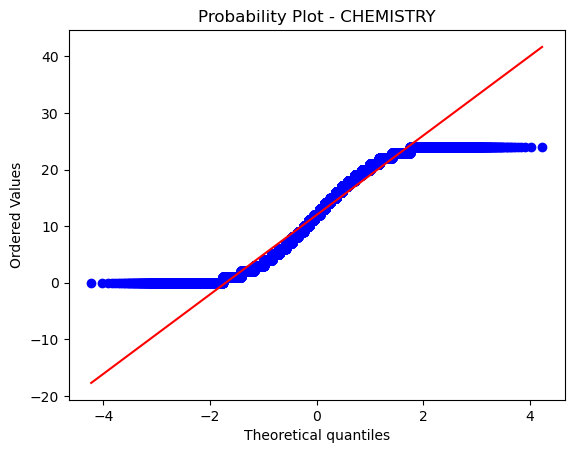

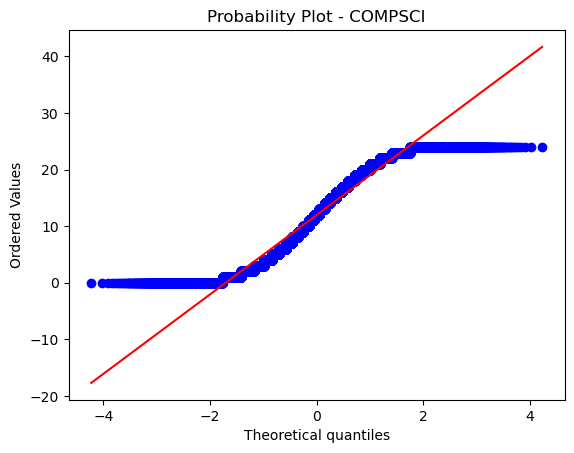

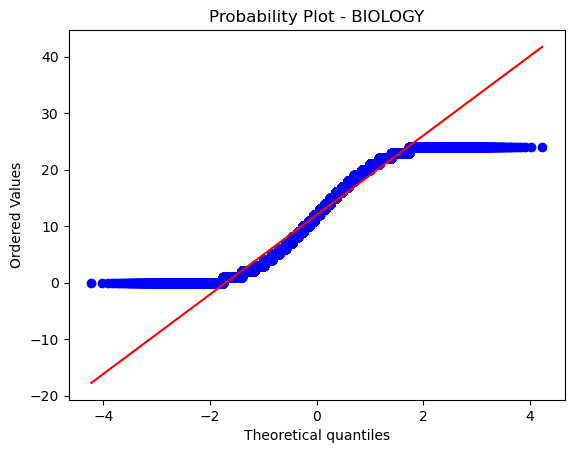

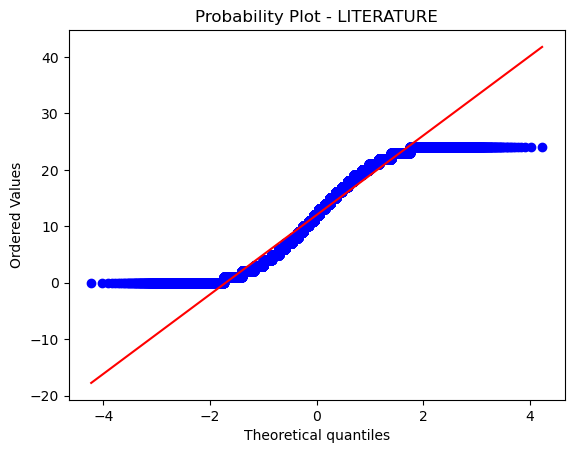

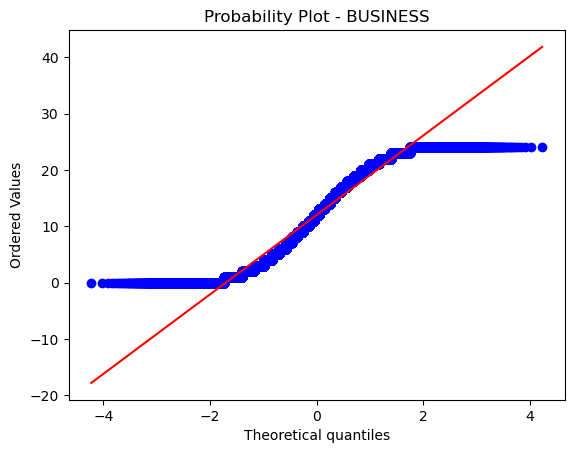

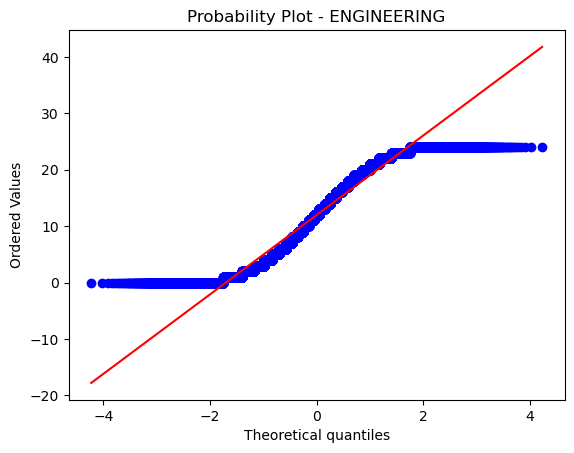

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is:

In [19]:
# perform anova test on major and yearsExperience


perform_anova_test('major', 'yearsExperience')

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


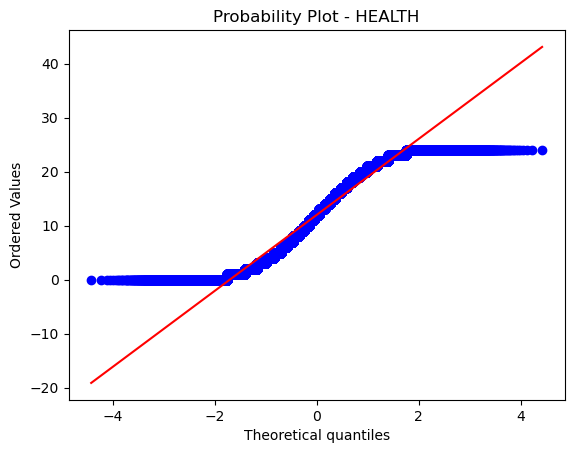

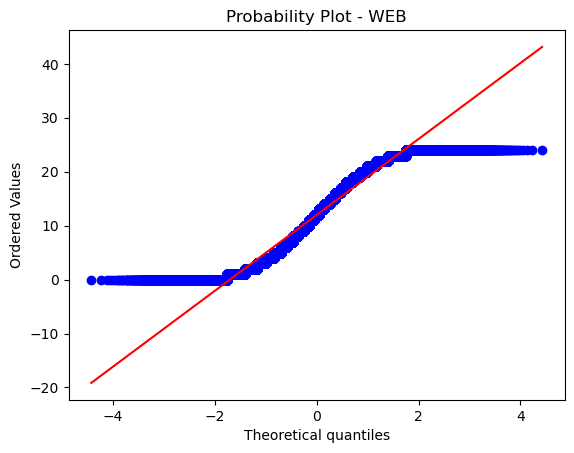

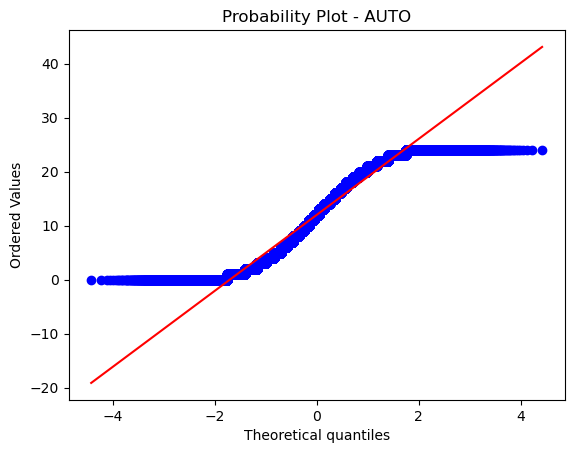

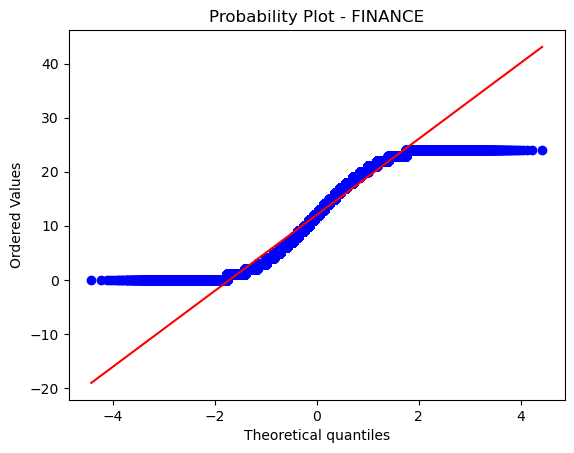

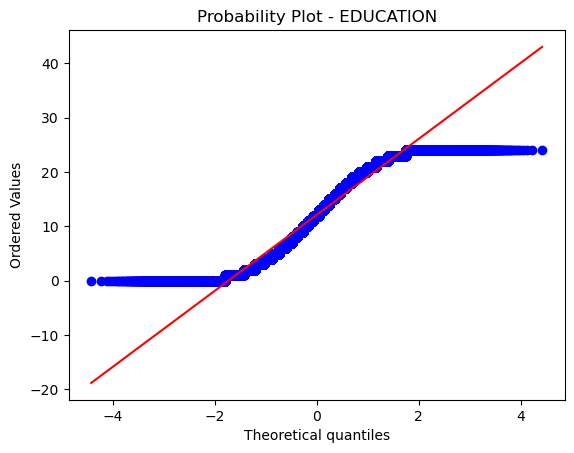

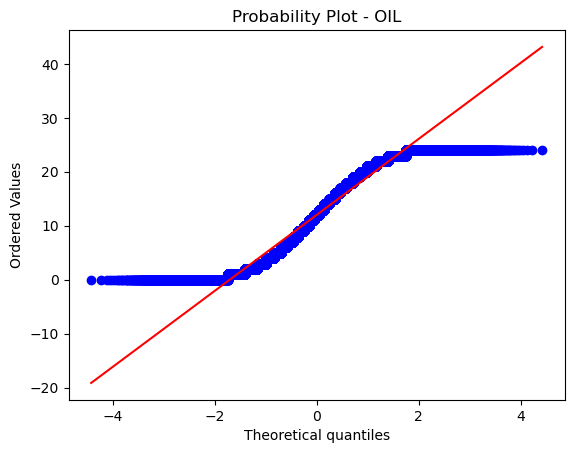

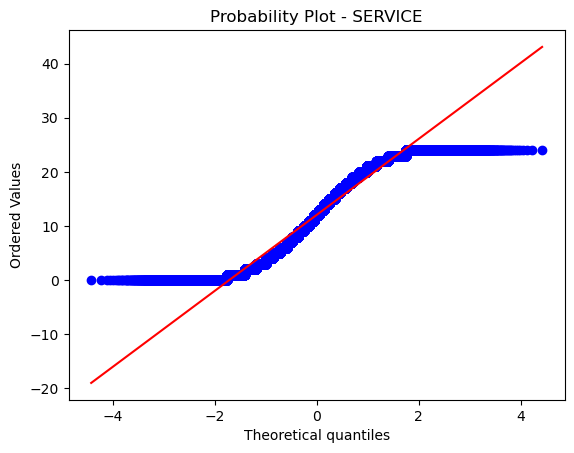

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value 

In [20]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry', 'yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

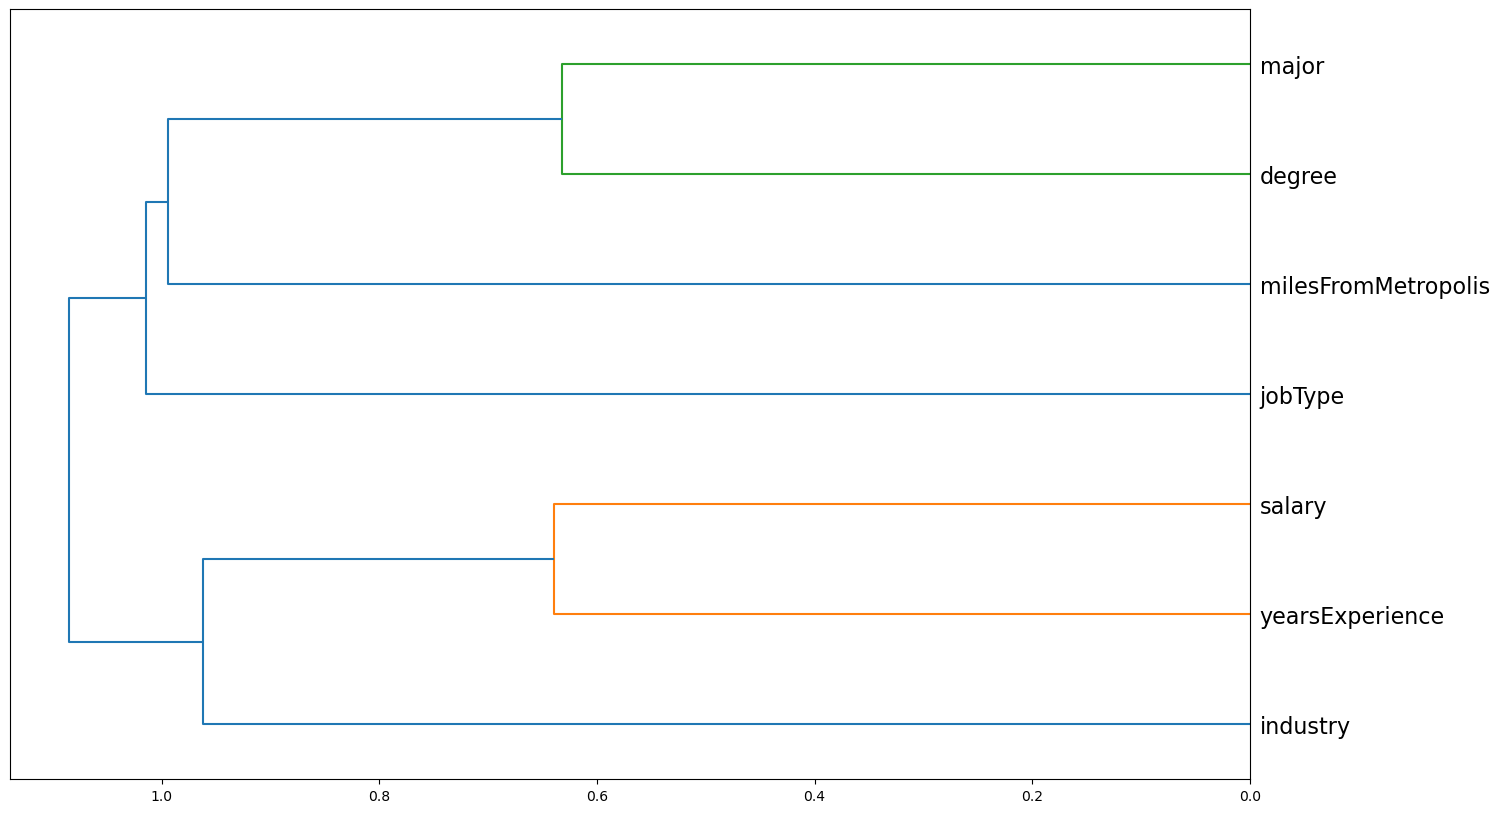

In [53]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()




observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

#### Since, there are no missing values and all the data are distributed equally. We can start converting the categorical values to numerical.

## Scaling

### Why scaling is necessary?

Scaling is necessary in machine learning for several reasons, which mainly involve improving the performance, stability, and efficiency of the algorithms. Some of the key reasons for scaling are:

1. Feature range variation: In many datasets, features can have different scales or units, making it difficult for the algorithm to compare or combine them effectively. Scaling ensures that all features have a similar range, which helps the algorithm learn and generalize better.

2. Gradient descent convergence: Many machine learning algorithms, such as neural networks and linear regression, rely on gradient descent optimization. When features have different scales, the optimization process may become slower and less stable, leading to a suboptimal solution. Scaling speeds up the convergence of the algorithm, making it more efficient and robust.

3. Regularization effectiveness: Regularization techniques, such as L1 and L2 regularization, are used to prevent overfitting by penalizing large model coefficients. When features are on different scales, the regularization term might unfairly penalize some features more than others, making the model biased. Scaling ensures that the regularization term affects all features equally.

4. Distance-based algorithms: Machine learning algorithms that rely on distance metrics, like k-Nearest Neighbors (k-NN) and Support Vector Machines (SVM), are highly sensitive to the feature scales. Scaling ensures that all features contribute equally to the distance metric, leading to more accurate and meaningful results.

5. Improved interpretability: Scaling helps in better understanding the importance of each feature in the final model. When features are on a similar scale, it is easier to interpret the magnitude of the coefficients and the effect of individual features on the model output.

6. Computational efficiency: Some algorithms may become more computationally efficient when the input data is scaled. This is because scaling can reduce the number of iterations required for convergence and improve the overall performance of the algorithm.

In [19]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [20]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data,col_train)



# Modelling

### One-hot-encoding

One-hot encoding is a technique used to represent categorical variables as binary vectors in machine learning and data processing. Categorical variables are those that take on a limited number of distinct categories or classes, such as colors, countries, or product types. Since many machine learning algorithms work with numerical data, it's often necessary to convert categorical data into a numerical format.

Here's how one-hot encoding works:

1. For a given categorical feature with N unique categories, create N new binary features, each representing one category.
2. For each instance in the dataset, set the binary feature corresponding to the category's value to 1, and set all other binary features to 0.

In [21]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [22]:
# Split the labels and the target
train_X = train_data.drop(['salary','yearsExperience','milesFromMetropolis'], axis=1)
train_Y = train_data['salary']

In [23]:
# Features

train_X.head()


jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [24]:
# Target

train_Y.head()


0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [25]:
# passing features dataframe for one hot encoding process

# List of categorical column names
categorical_columns = ['jobType', 'degree', 'major', 'industry']

encoder = OneHotEncoder()
train_X_encoded = encoder.fit_transform(train_data[categorical_columns])

# List of numerical column names
numerical_columns = ['yearsExperience', 'milesFromMetropolis']

# Concatenate the encoded categorical features with the numerical features
train_X = pd.concat([train_X_encoded, train_data[numerical_columns]], axis=1)
train_X.head()




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [26]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.2)


In [27]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
    


# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test),Y_test),
           m.score(X_train, Y_train), m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train), metrics.mean_absolute_error(m.predict(X_test), Y_test)
          ]

    
    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [28]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df],
                                     axis=0, ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
            .sum()[['feature_importance']]\
            .sort_values('feature_importance', ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                 x='feature_importance',
                 y='column',
                 order=order,
                 ax=ax,
                 palette='viridis',
                 orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax


### Linear Regression
Linear Regression is a fundamental machine learning (ML) algorithm that models the relationship between a dependent variable (target) and one or more independent variables (features). It's a simple, yet powerful method for predicting continuous values in regression tasks.

The goal of linear regression is to find the best-fitting straight line (or hyperplane in the case of multiple features) that minimizes the residual errors between the predicted values and the actual values in the dataset. 

RMSE-Train: 19.620601569983112
RMSE-Test: 19.556386194089587
Score-Train: 0.7434225414458826
Score-Test: 0.7439708606785416
MedAE-Train: 13.7333984375
MedAE-Test: 13.71551513671875
MeanAE-Train: 15.85516403289795
MeanAE-Test: 15.801939214477539 

CPU times: user 2.51 s, sys: 715 ms, total: 3.22 s
Wall time: 967 ms


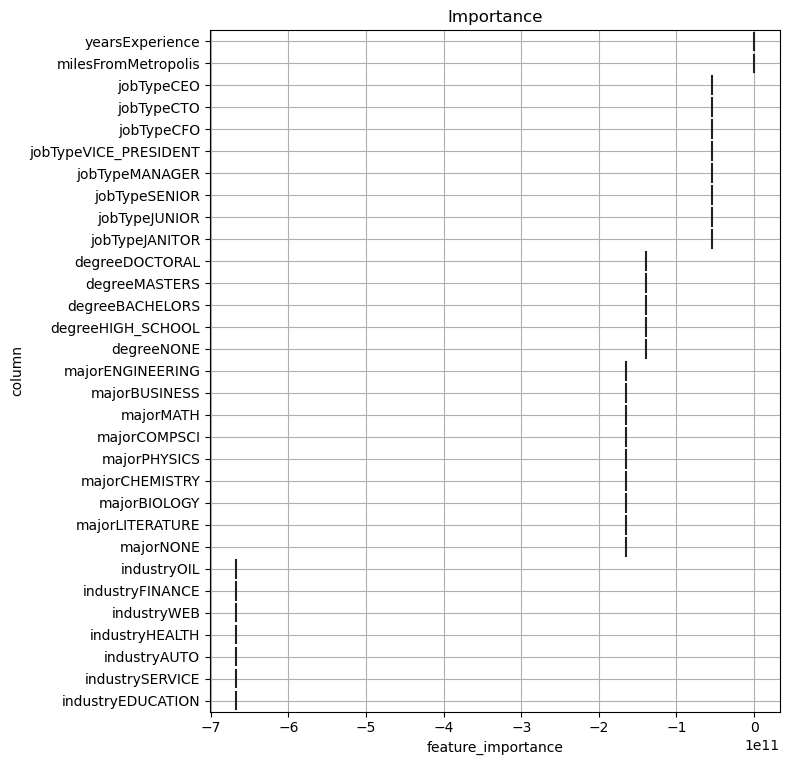

In [29]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train, Y_train)

# print score of the model
print_score(lModel)

# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, train_X)




### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 20.045113506884853
RMSE-Test: 20.599259137894464
Score-Train: 0.7321997974539083
Score-Test: 0.7159365297049103
MedAE-Train: 13.069999999999993
MedAE-Test: 13.909999999999997
MeanAE-Train: 15.822628558284626
MeanAE-Test: 16.460523758860024 

CPU times: user 1min 17s, sys: 413 ms, total: 1min 17s
Wall time: 1min 17s


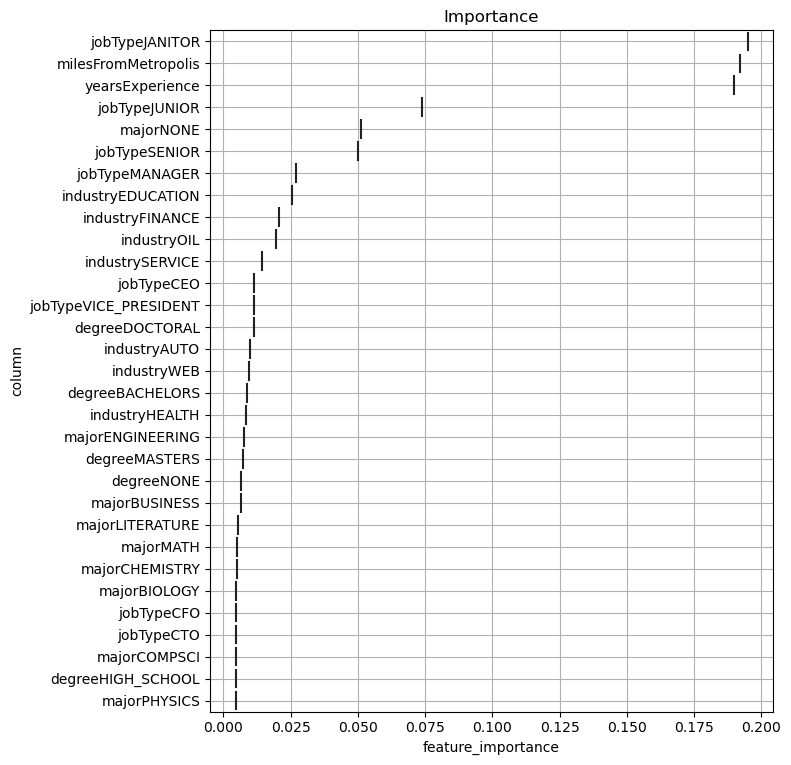

In [30]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()


# Fit the model to the data

rf.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:50000])




### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

In [31]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()


# print score of the model
knnr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model

print_score(knnr)


RMSE-Train: 23.8660500208976
RMSE-Test: 23.88713858962611
Score-Train: 0.6203748691950031
Score-Test: 0.6180201579390326
MedAE-Train: 15.199999999999989
MedAE-Test: 15.199999999999989
MeanAE-Train: 18.594098500000005
MeanAE-Test: 18.615240000000004 

CPU times: user 17min 39s, sys: 5min 20s, total: 22min 59s
Wall time: 10min 52s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.42206674123746
RMSE-Test: 19.369449718226303
Score-Train: 0.7485887276880084
Score-Test: 0.7488421529215681
MedAE-Train: 13.630791015709207
MedAE-Test: 13.586131740929517
MeanAE-Train: 15.68899968875508
MeanAE-Test: 15.64353749552397 

CPU times: user 7.39 s, sys: 164 ms, total: 7.56 s
Wall time: 7.59 s


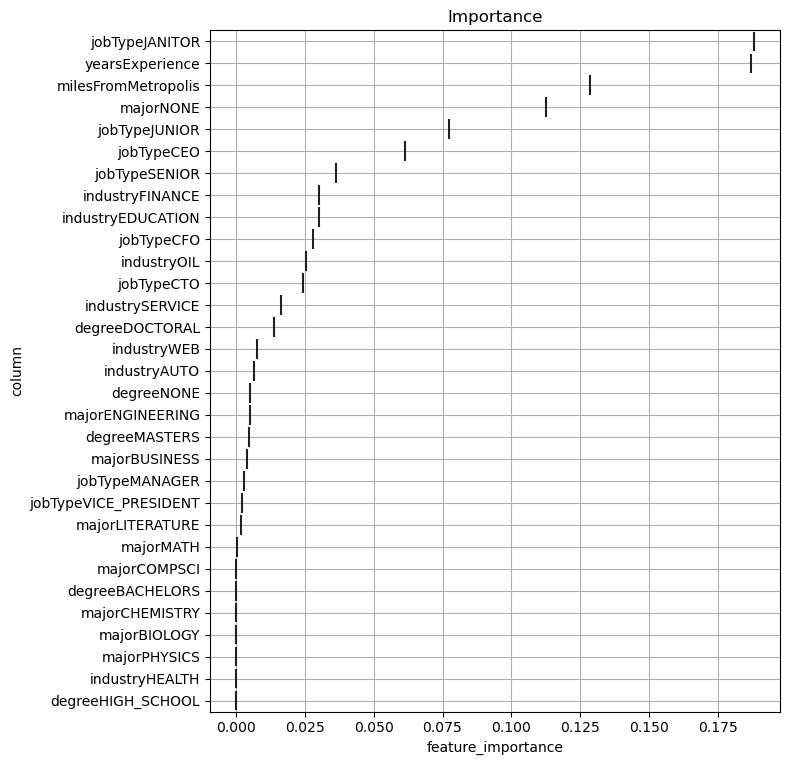

In [32]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])




### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [33]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# print score of the model

print_score(DTR)


RMSE-Train: 26.8727577565914
RMSE-Test: 27.736206038617944
Score-Train: 0.518697257917277
Score-Test: 0.48500110653783157
MedAE-Train: 16.0
MedAE-Test: 18.0
MeanAE-Train: 20.284229166666663
MeanAE-Test: 21.6360675 

CPU times: user 1.02 s, sys: 12 ms, total: 1.03 s
Wall time: 1.03 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 25.17633443934572
RMSE-Test: 25.092653940771385
Score-Train: 0.5775465514911904
Score-Test: 0.5784924281044219
MedAE-Train: 19.313061687461825
MedAE-Test: 19.28416639185943
MeanAE-Train: 20.996379785890277
MeanAE-Test: 20.91780052636213 

CPU times: user 15.8 s, sys: 1.89 s, total: 17.7 s
Wall time: 18 s


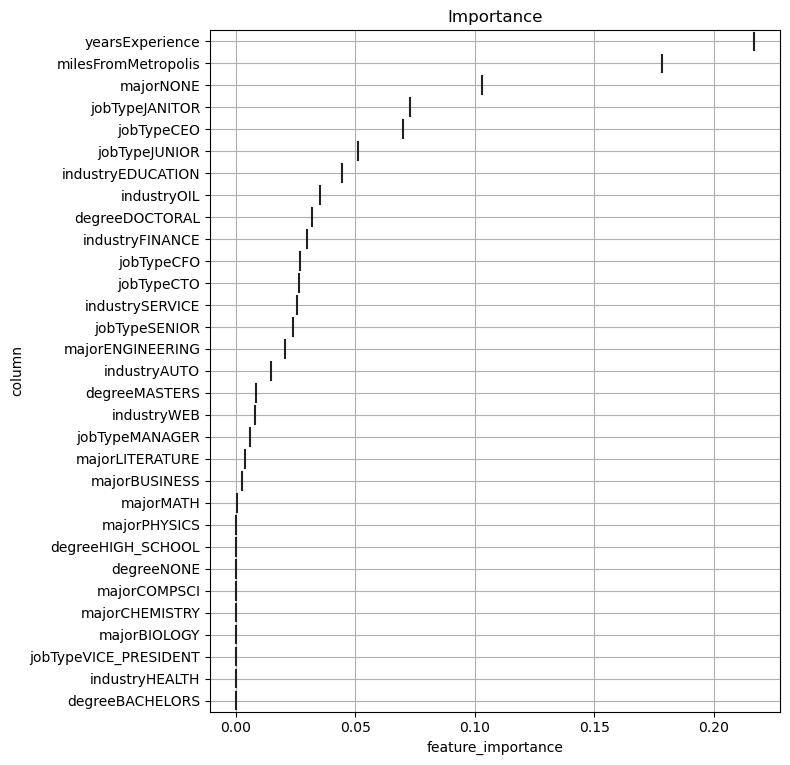

In [34]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model
AdaBoost.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model
print_score(AdaBoost)

# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_, train_X.iloc[1:50000])




### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

RMSE-Train: 19.299917771392078
RMSE-Test: 19.376004521905354
Score-Train: 0.7517411273853383
Score-Test: 0.7486721358107752
MedAE-Train: 13.426403045654297
MedAE-Test: 13.46978759765625
MeanAE-Train: 15.567980035107135
MeanAE-Test: 15.630803948602676 

CPU times: user 33.9 s, sys: 1.15 s, total: 35.1 s
Wall time: 4.66 s


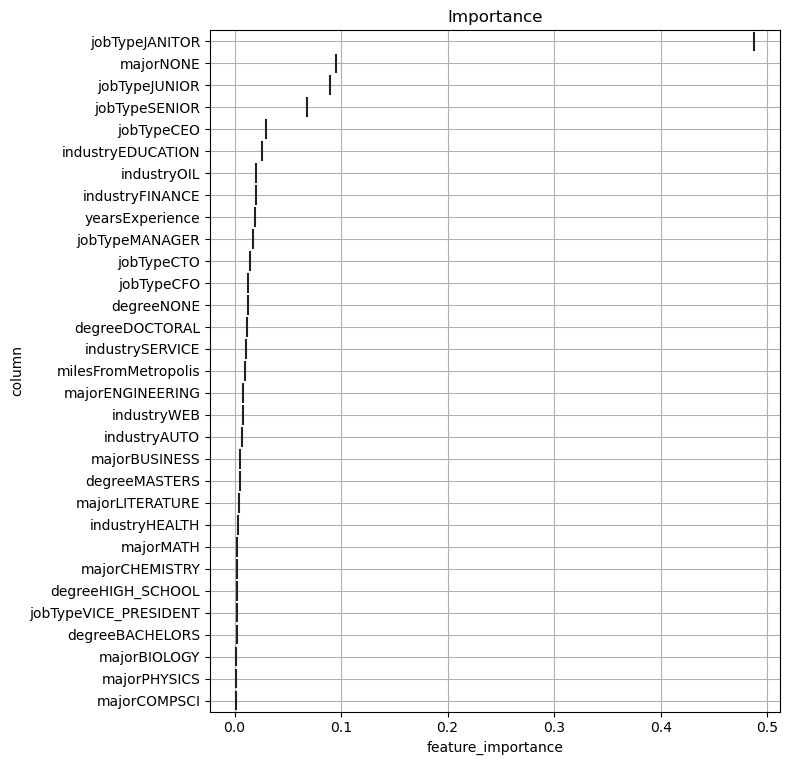

In [35]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

# Fit the model to the data

xgbr.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])


# print score of the model

print_score(xgbr)

# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:50000])



### Comparing all the model based on metric

In [36]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [37]:
# list of models object
# list of models name
models= [DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

#### RMSE of all model on train and test data

In [38]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric      Dtree     Forest       Knn        GBR     Xboost   AdaBoost
0   rmse  26.872758  20.045114  23.86605  19.422067  19.299918  25.176334


  Metric      Dtree     Forest        Knn       GBR     Xboost   AdaBoost
0   rmse  27.736206  20.599259  23.887139  19.36945  19.376005  25.092654


#### All metrics on train and test data

In [39]:
# printing comparision of model on train and test

print("Results on Test data")
comp_model_test


Results on Test data


Metric      Dtree     Forest        Knn        GBR     Xboost   AdaBoost
0       rmse  27.736206  20.599259  23.887139  19.369450  19.376005  25.092654
1      MedAE  18.000000  13.910000  15.200000  13.586132  13.469788  19.284166
2        MAE  21.636067  16.460524  18.615240  15.643537  15.630804  20.917801
3  R-squared   0.493888   0.635943   0.443078   0.618216   0.675770   0.167405

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [40]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid, 
                              n_iter=20, 
                              cv=3, 
                              verbose=2, 
                              random_state=42, 
                              n_jobs=-1)
  #Fit the random search model
  random.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
  print(random.best_params_)


  

In [41]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(), X_train, Y_train, param_grid=rf_para_grid)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False}


In [42]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(GradientBoostingRegressor(), X_train, Y_train, param_grid=GBR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25}


In [43]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
    "splitter": ["best", "random"],
    "max_depth": np.linspace(1, 32, 32, endpoint=True),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
    "min_weight_fraction_leaf": np.linspace(0.0, 0.5, 6, endpoint=True),
    "max_features": ["auto", "log2", "sqrt", None],
}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid=DTR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 8.0}


In [44]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBRegressor(), X_train, Y_train, param_grid=XGB_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 30.23668296179755
RMSE-Test: 30.15173190892118
Score-Train: 0.39065654029339336
Score-Test: 0.3913933236480076
MedAE-Train: 20.6785714285715
MedAE-Test: 20.611550151975578
MeanAE-Train: 24.25321040281284
MeanAE-Test: 24.14956755877987 

CPU times: user 6.6 s, sys: 25.9 ms, total: 6.63 s
Wall time: 6.63 s


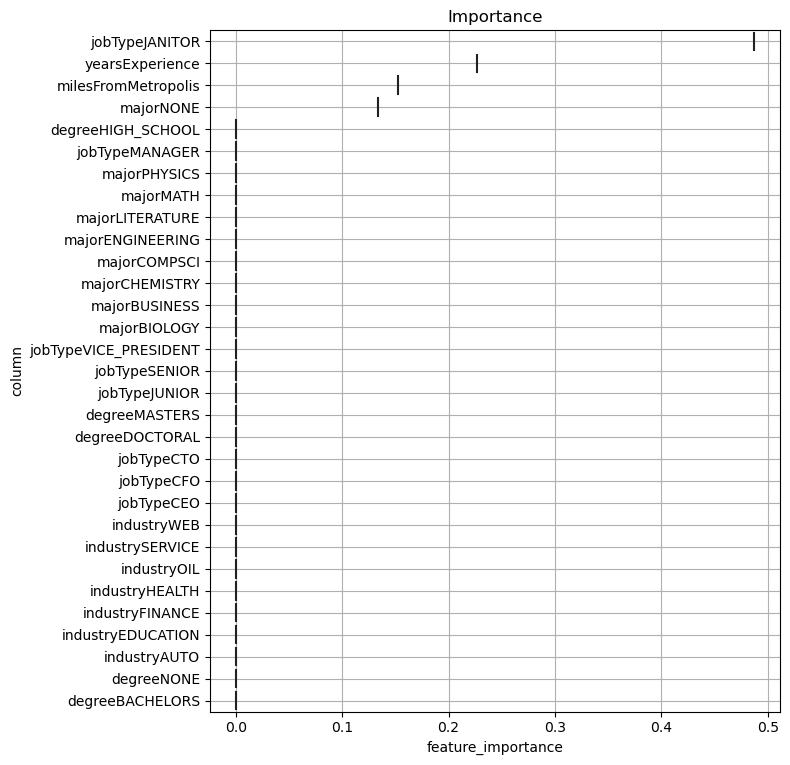

In [52]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})

# Fit the model to the data
rf.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])


# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:10000])




### Gradient Boosting Regressor

RMSE-Train: 19.132322283688993
RMSE-Test: 19.09834223728965
Score-Train: 0.7560340383525201
Score-Test: 0.7558236883547783
MedAE-Train: 13.46051102167953
MedAE-Test: 13.426629777639143
MeanAE-Train: 15.50400653594158
MeanAE-Test: 15.475385603983675 

CPU times: user 9.19 s, sys: 26.6 ms, total: 9.22 s
Wall time: 9.22 s


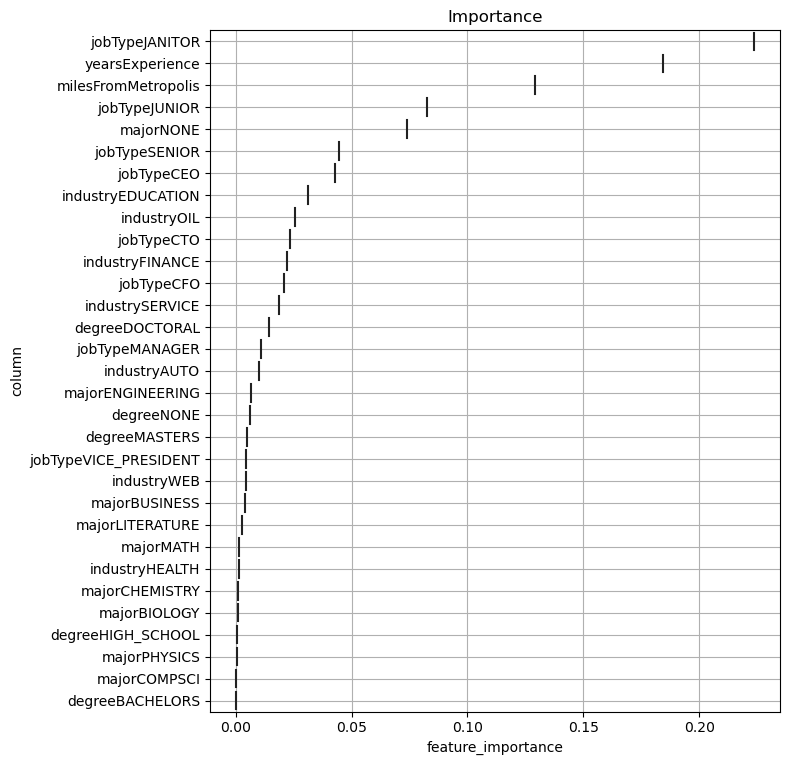

In [53]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset
 
# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8.0, 'learning_rate': 0.25})

GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])
# print score of the model

print_score(GBR)

# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])



### Decision Tree Regrsessor

In [54]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 8.0})

DTR.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])
# print score of the model
print_score(DTR)



RMSE-Train: 35.26429016478137
RMSE-Test: 35.15449476851449
Score-Train: 0.1711724962891209
Score-Test: 0.1726792675788822
MedAE-Train: 24.685141760818595
MedAE-Test: 24.314858239181405
MeanAE-Train: 28.38217117746661
MeanAE-Test: 28.257872646323918 

CPU times: user 175 ms, sys: 2.03 ms, total: 177 ms
Wall time: 176 ms


### XGBoost Regressor

RMSE-Train: 19.33848264250499
RMSE-Test: 19.30442462875244
Score-Train: 0.7507480001671225
Score-Test: 0.7505256440286178
MedAE-Train: 13.517589569091797
MedAE-Test: 13.507843017578125
MeanAE-Train: 15.626411048543453
MeanAE-Test: 15.601804258356095 

CPU times: user 17.4 s, sys: 516 ms, total: 17.9 s
Wall time: 2.47 s


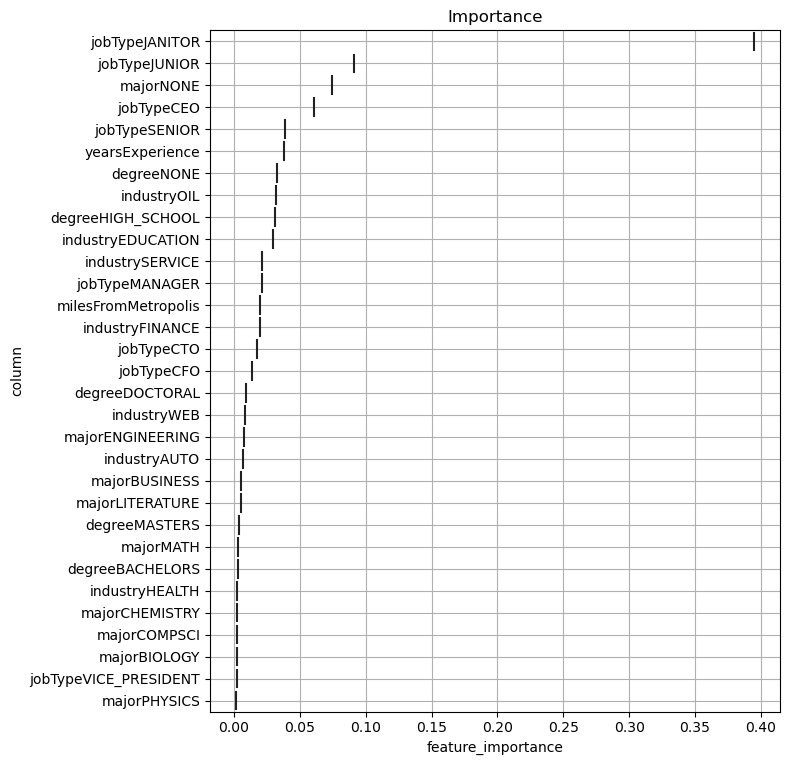

In [55]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})

# Fit the model to the data

xgbr.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model
print_score(xgbr)


# visualizing the inportance of features.
fig, ax = fig, ax = visualize_importance(xgbr.feature_importances_, train_X.iloc[1:10000])





## Comparing the metrics for tuned models

In [56]:
# models= [DTR, rf,GBR, xgbr]
# names = ['Dtree', 'Forest','GBR', 'Xboost']
# comp_model_train,comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)

models= [DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)


In [50]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric      Dtree     Forest        Knn        GBR     Xboost   AdaBoost
0       rmse  34.804654  30.236683  23.866050  19.132322  19.338483  25.176334
1      MedAE  24.031760  20.678571  15.200000  13.460511  13.517590  19.313062
2        MAE  27.963322  24.253210  18.594099  15.504007  15.626411  20.996380
3  R-squared  -3.140313  -0.505732   0.445780   0.681708   0.673927   0.162170

In [51]:
print("Metrics on test data")
comp_model_test

Metrics on test data


Metric      Dtree     Forest        Knn        GBR     Xboost   AdaBoost
0       rmse  34.718474  30.151732  23.887139  19.098342  19.304425  25.092654
1      MedAE  23.968240  20.611550  15.200000  13.426630  13.507843  19.284166
2        MAE  27.859484  24.149568  18.615240  15.475386  15.601804  20.917801
3  R-squared  -3.119347  -0.492543   0.443078   0.681472   0.673582   0.167405

### Now working with the test dataset provided

In [58]:
# test data 
test_X = test_data
test_X

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [59]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = scale_data(test_X,col_test)


In [60]:

# List of categorical column names
categorical_columns = ['jobType', 'degree', 'major', 'industry']

encoder = OneHotEncoder()
test_X_encoded = encoder.fit_transform(test_X[categorical_columns])

# List of numerical column names
numerical_columns = ['yearsExperience', 'milesFromMetropolis']

# Concatenate the encoded categorical features with the numerical features
test_X = pd.concat([test_X_encoded, test_X[numerical_columns]], axis=1)
test_X.head()




jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [61]:
# Perforn the prediction on the test dataset
y_predicted = GBR.predict(test_X)

y_predicted




array([113.82250474,  84.36056496, 178.54862835, ...,  54.42515503,
       157.51978995, 117.6471893 ])

In [101]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)

In [102]:
# predicted values in dataframe
predictions

0
0       107.961263
1        91.214582
2       179.547811
3       106.155894
4       115.114669
...            ...
999995  167.807250
999996  106.088058
999997   49.000009
999998  155.260285
999999  116.597763

[1000000 rows x 1 columns]

**Business Problem:**

In [105]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train_data.sample(100)

sample_X = sample.drop(['salary','yearsExperience','milesFromMetropolis'], axis=1)
sample_X

jobId companyId         jobType       degree        major  \
393390  JOB1362684801077     COMP6         JANITOR         NONE         NONE   
394070  JOB1362684801757     COMP9             CTO      MASTERS  ENGINEERING   
304522  JOB1362684712209    COMP32          JUNIOR     DOCTORAL    CHEMISTRY   
515815  JOB1362684923502    COMP40         JANITOR         NONE         NONE   
146295  JOB1362684553982    COMP15          JUNIOR      MASTERS         NONE   
...                  ...       ...             ...          ...          ...   
704650  JOB1362685112337    COMP44             CEO    BACHELORS      PHYSICS   
609776  JOB1362685017463    COMP14             CEO         NONE         NONE   
946403  JOB1362685354090    COMP11         JANITOR  HIGH_SCHOOL         NONE   
375924  JOB1362684783611    COMP37             CFO    BACHELORS      COMPSCI   
592739  JOB1362685000426    COMP14  VICE_PRESIDENT    BACHELORS    CHEMISTRY   

         industry  
393390  EDUCATION  
394070        OIL  
304522        OIL  
515815    FINANCE  
146295     HEALTH  
...           ...  
704650        WEB  
609776     HEALTH  
946403     HEALTH  
375924     HEALTH  
592739     HEALTH  

[100 rows x 6 columns]

In [112]:
# encoding the samples
encoder = OneHotEncoder()
train_X_encoded = encoder.fit_transform(sample[categorical_columns])

# Convert the sparse matrix to a dense numpy array

train_X_array = train_X_encoded.values
# Convert the numpy array to a DataFrame
train_X_df = pd.DataFrame(train_X_array, columns=encoder.get_feature_names(categorical_columns))

# List of numerical column names
numerical_columns = ['yearsExperience', 'milesFromMetropolis','salary']

# Reset indices for both DataFrames
train_X_df.reset_index(drop=True, inplace=True)
sample_numerical = sample[numerical_columns].reset_index(drop=True)

# Ensure both DataFrames have the same number of rows
assert train_X_df.shape[0] == sample_numerical.shape[0], "DataFrames have different number of rows"

# Concatenate the DataFrames column-wise and reset the index
train_X = pd.concat([train_X_df, sample_numerical], axis=1)

#Taking those samples whose salary is very less i.e the reason for employee resigning
sample = train_X[train_X['salary'] < 60]
sample

#Preparing the x and y values
x_sample = sample.drop('salary', axis=1)
y_sample = sample['salary']

#Passing the data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = scale_data(x_sample, col_test)
sample_x

jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  jobType_JUNIOR  \
0           0.0          0.0          0.0              1.0             0.0   
11          0.0          0.0          0.0              1.0             0.0   
73          0.0          0.0          0.0              1.0             0.0   
83          0.0          0.0          0.0              1.0             0.0   

    jobType_MANAGER  jobType_SENIOR  jobType_VICE_PRESIDENT  degree_BACHELORS  \
0               0.0             0.0                     0.0               0.0   
11              0.0             0.0                     0.0               0.0   
73              0.0             0.0                     0.0               0.0   
83              0.0             0.0                     0.0               0.0   

    degree_DOCTORAL  ...  major_PHYSICS  industry_AUTO  industry_EDUCATION  \
0               0.0  ...            0.0            0.0                 1.0   
11              0.0  ...            0.0            0.0                 0.0   
73              0.0  ...            0.0            0.0                 0.0   
83              0.0  ...            0.0            1.0                 0.0   

    industry_FINANCE  industry_HEALTH  industry_OIL  industry_SERVICE  \
0                0.0              0.0           0.0               0.0   
11               0.0              0.0           0.0               1.0   
73               0.0              1.0           0.0               0.0   
83               0.0              0.0           0.0               0.0   

    industry_WEB  yearsExperience  milesFromMetropolis  
0            0.0         1.000000             0.000000  
11           0.0         0.083333             0.153846  
73           0.0         0.000000             0.865385  
83           0.0         0.083333             1.000000  

[4 rows x 31 columns]

In [113]:
#predicting the sample
predicted_out = GBR.predict(sample_x)
predicted_out

array([103.91397888,  50.27865942,  39.43009522,  34.16114645])

In [114]:
y_sample  #Real values

0     56
11    56
73    48
83    38
Name: salary, dtype: int64

[CV] END bootstrap=False, max_depth=27.0, max_features=auto, min_samples_leaf=0.1, n_estimators=64; total time=   1.9s
[CV] END bootstrap=False, max_depth=30.0, max_features=sqrt, min_samples_leaf=0.5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=7.0, max_features=auto, min_samples_leaf=0.30000000000000004, n_estimators=64; total time=   0.6s
[CV] END bootstrap=False, max_depth=31.0, max_features=auto, min_samples_leaf=0.4, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=28.0, max_features=auto, min_samples_leaf=0.1, n_estimators=8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=16.0, min_samples_split=0.6, n_estimators=1; total time=   0.0s
[CV] END learning_rate=0.5, max_depth=28.0, min_samples_split=0.9, n_estimators=200; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_split=0.30000000000000004, n_estimators=32; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=31.0, min_samples_split=0.3

[CV] END bootstrap=False, max_depth=27.0, max_features=auto, min_samples_leaf=0.1, n_estimators=64; total time=   1.9s
[CV] END bootstrap=False, max_depth=30.0, max_features=sqrt, min_samples_leaf=0.5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=4.0, max_features=auto, min_samples_leaf=0.30000000000000004, n_estimators=8; total time=   0.1s
[CV] END bootstrap=False, max_depth=4.0, max_features=auto, min_samples_leaf=0.30000000000000004, n_estimators=8; total time=   0.1s
[CV] END bootstrap=False, max_depth=1.0, max_features=auto, min_samples_leaf=0.5, n_estimators=8; total time=   0.0s
[CV] END bootstrap=True, max_depth=2.0, max_features=auto, min_samples_leaf=0.5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=19.0, max_features=sqrt, min_samples_leaf=0.30000000000000004, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=19.0, max_features=sqrt, min_samples_leaf=0.30000000000000004, n_estimators=4; total time=   

[CV] END bootstrap=True, max_depth=10.0, max_features=sqrt, min_samples_leaf=0.1, n_estimators=32; total time=   0.2s
[CV] END bootstrap=False, max_depth=27.0, max_features=auto, min_samples_leaf=0.1, n_estimators=64; total time=   1.8s
[CV] END bootstrap=False, max_depth=7.0, max_features=auto, min_samples_leaf=0.30000000000000004, n_estimators=64; total time=   0.6s
[CV] END bootstrap=False, max_depth=31.0, max_features=auto, min_samples_leaf=0.4, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=31.0, max_features=auto, min_samples_leaf=0.4, n_estimators=16; total time=   0.2s
[CV] END learning_rate=1, max_depth=10.0, min_samples_split=0.6, n_estimators=32; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=30.0, min_samples_split=0.4, n_estimators=100; total time=   3.5s
[CV] END learning_rate=1, max_depth=28.0, min_samples_split=0.1, n_estimators=8; total time=   0.5s
[CV] END learning_rate=1, max_depth=28.0, min_samples_split=0.1, n_estimators=8; total

### As we can see the difference in values.

In the final example, the actual salary is 46, while the model predicts a value of 56. This discrepancy could be attributed to other competitors offering a higher salary compared to the employee's current compensation, which may be the driving factor behind the employee's decision to resign.

The noticeable difference between the employee's real salary and the predicted salary highlights a possible reason for the employee's departure from the company.

## **`Insights`**:


A significant number of employees in your company are dissatisfied with their salaries, even though they possess the necessary skills to perform their jobs effectively compared to competitors.

Employees residing in metropolitan areas appear to be content with their salaries. However, those living further away from the city are not receiving satisfactory compensation, which is likely the primary reason for their decision to leave the company.

    


## **`solution`**:

Consider raising the salaries of employees who possess the required degrees and majors.

Offer accommodations to individuals living in remote areas to increase their satisfaction.

Grant appraisals or tokens of appreciation to deserving employees.

Note: Implement measures to enhance employee loyalty towards the company.

## **`Possible Application`**:

The HR department has provided details about a newly hired employee and requested that we predict a salary range that the company could potentially offer this individual.



## **`CONCLUSION`**:
Based on the results from this model, the predicted values align with the actual target values, indicating good performance. Although we used only 50,000 samples, the model might perform even better when trained on the entire dataset. We have conducted exploratory data analysis, preprocessed the data, built various models, visualized feature importance, performed hyperparameter tuning for each model, and made predictions.